<a href="https://colab.research.google.com/github/LEEAHRI/project/blob/main/Project01_%EC%9D%B4%EC%95%84%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***데이터*** ***전처리***

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
#모든 데이터 프레임 불러오기 
'''
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
'''
df = pd.read_csv('gamedata(연도수정).csv', index_col=0)

In [ ]:
df.head()

In [ ]:
#컬럼명 보기쉽게 바꾸기 

df = df.rename({'Name':'타이틀'},axis='columns')
df = df.rename({'Platform':'게임기'},axis='columns')
df = df.rename({'Year':'연도'},axis='columns')
df = df.rename({'Genre':'장르'},axis='columns')
df = df.rename({'Publisher':'게임사'},axis='columns')
df = df.rename({'NA_Sales':'북미'},axis='columns')
df = df.rename({'EU_Sales':'유럽'},axis='columns')
df = df.rename({'JP_Sales':'일본'},axis='columns')
df = df.rename({'Other_Sales':'기타국가'},axis='columns')

df.head()

In [ ]:
df.shape

In [ ]:
#데이터 결측치 확인
df.isnull().sum()

## ***Year 전처리***

In [ ]:

df['연도'].value_counts()

In [ ]:
#행(로우) 기준으로 결측치 삭제하기

df = df.dropna()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
#총 359개의 행 날려버림.. 
#결측치 다시 확인
df.isnull().sum()

In [ ]:
#데이터 타입 변경. (우선 연도만 정수형으로)
#함수사용
'''
def to_int(obj):
  obj = str(obj).replace(',',"")
  return int(obj)
'''

In [ ]:
#이미 연도가 실수형이라. 정수형으로 바꿔주기 
df = df.astype({'연도': 'int'})

In [ ]:
#연도 타입바뀐거 확인
df.dtypes

In [ ]:
df['연도']

## ***Sales 전처리***

In [ ]:
#K와M 제거하기 

df['북미'] = df['북미'].str.replace('K','')
df['북미'] = df['북미'].str.replace('M','')
df['유럽'] = df['유럽'].str.replace('K','')
df['유럽'] = df['유럽'].str.replace('M','')
df['일본'] = df['일본'].str.replace('K','')
df['일본'] = df['일본'].str.replace('M','')
df['기타국가'] = df['기타국가'].str.replace('K','')
df['기타국가'] = df['기타국가'].str.replace('M','')

In [ ]:
#sales에 숫자 밖에 안남을 것을 확인
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

In [ ]:
#sales 데이터 값을 실수형으로 변경하기 

#함수사용

def to_flo(obj):
  obj = str(obj).replace(',',"")
  return float(obj)


In [ ]:
df['북미'] = df['북미'].apply(to_flo)
df['유럽'] = df['유럽'].apply(to_flo)
df['일본'] = df['일본'].apply(to_flo)
df['기타국가'] = df['기타국가'].apply(to_flo)

In [ ]:
#sales의 타입 바뀐것을 확인. 
df.dtypes


In [ ]:
print(type(df['북미']))

In [ ]:
#list타입으로 변환
a = np.array(df['북미'].tolist())
print(a)

In [ ]:
'''
#기본단위를 M로 맞춰주자. 
# 1M = 1000K
new_list1 = []

def check_integer(a):
    for i in a:
        if i >= int(10) and i%i == 0:
            new = i*int(0.001)
            return_list.append(new)

    return new_list1
'''

In [ ]:

a_sales = df['북미']>= 10
a_sales1 = df['북미']%10 == 0
k_df1 = df[a_sales & a_sales1]

k_df1


In [ ]:
k_df1['북미'] = k_df1['북미'] * 0.001

In [ ]:
k_df1

# **단위변환(k) 다시해보기**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gamedata(단위 수정).csv to gamedata(단위 수정).csv


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('gamedata(단위 수정).csv', index_col=0)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
#컬럼명 보기쉽게 바꾸기 

df = df.rename({'Name':'타이틀'},axis='columns')
df = df.rename({'Platform':'게임기'},axis='columns')
df = df.rename({'Year':'연도'},axis='columns')
df = df.rename({'Genre':'장르'},axis='columns')
df = df.rename({'Publisher':'게임사'},axis='columns')
df = df.rename({'NA_Sales':'북미'},axis='columns')
df = df.rename({'EU_Sales':'유럽'},axis='columns')
df = df.rename({'JP_Sales':'일본'},axis='columns')
df = df.rename({'Other_Sales':'기타국가'},axis='columns')

df.head()

,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [ ]:
df.isnull().sum()

타이틀       0
게임기       0
연도      271
장르       50
게임사      58
북미        0
유럽        0
일본        0
기타국가      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df = df.astype({'연도': 'int'})

# ***EDA***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib
%matplotlib inline 
sns.set()

In [ ]:
df.head()

,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


연도별 게임의 트렌드

In [ ]:
#연도별로 정렬한 새로운 df

year_df = df.sort_values(by=['연도'], axis=0) 

year_df.reset_index(drop=True, inplace=True)

year_df


,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01
1,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05
2,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00
4,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00
16238,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00


In [ ]:
#장르별로 정렬한 새로운 df

gen_df = df.sort_values(by=['장르'], axis=0) 

gen_df.reset_index(drop=True, inplace=True)

gen_df


,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,Skylanders: SuperChargers,XOne,2015,Action,Activision,0.16,0.05,0.00,0.02
2,Ghostbusters: The Video Game (DS Version),PC,2010,Action,Take-Two Interactive,0.00,0.08,0.00,0.02
3,Saints Row IV,X360,2013,Action,Deep Silver,1.01,0.53,0.01,0.14
4,Monkey Hero,PS,1998,Action,Take-Two Interactive,0.04,0.03,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16236,Supreme Commander,PC,2007,Strategy,THQ,0.00,0.04,0.00,0.01
16237,Age of Empires Online,PC,2011,Strategy,Microsoft Game Studios,0.01,0.04,0.00,0.01
16238,Codename: Panzers Cold War,PC,2009,Strategy,Atari,0.00,0.02,0.00,0.01
16239,Men of War: Vietnam,PC,2011,Strategy,Unknown,0.00,0.03,0.00,0.01


In [ ]:
action = gen_df[gen_df['장르'] == 'Action']

action

,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,Skylanders: SuperChargers,XOne,2015,Action,Activision,0.16,0.05,0.00,0.02
2,Ghostbusters: The Video Game (DS Version),PC,2010,Action,Take-Two Interactive,0.00,0.08,0.00,0.02
3,Saints Row IV,X360,2013,Action,Deep Silver,1.01,0.53,0.01,0.14
4,Monkey Hero,PS,1998,Action,Take-Two Interactive,0.04,0.03,0.00,0.00
...,...,...,...,...,...,...,...,...,...
3235,Rampage World Tour,PS,1997,Action,GT Interactive,0.47,0.32,0.00,0.06
3236,Gundam Breaker 2,PS3,2014,Action,Namco Bandai Games,0.00,0.00,0.14,0.00
3237,Tomb Raider II,PS,1997,Action,Eidos Interactive,2.30,2.46,0.20,0.28
3238,The Warriors,PS2,2005,Action,Take-Two Interactive,0.44,0.02,0.00,0.07


In [ ]:
action['연도'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2008
1       2015
2       2010
3       2013
4       1998
        ... 
3235    1997
3236    2014
3237    1997
3238    2005
3239    2011
Name: 연도, Length: 3240, dtype: int64>

In [ ]:
df.groupby('장르').get_group('Action')

,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01
16,Mini Ninjas,PS3,2009,Action,Eidos Interactive,0.14,0.16,0.00,0.06
...,...,...,...,...,...,...,...,...,...
16576,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08
16582,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02
16584,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00


In [ ]:
year_ac_df = action.sort_values(by=['연도'], axis=0) 

year_ac_df

,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가
2020,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00
2003,Air Raid,2600,1981,Action,Men-A-Vision,0.72,0.04,0.00,0.01
3132,Frogs And Flies,2600,1981,Action,Mattel Interactive,0.33,0.02,0.00,0.00
3117,Crazy Climber,2600,1981,Action,Atari,0.21,0.01,0.00,0.00
3091,Astroblast,2600,1981,Action,Mattel Interactive,0.29,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2536,7 Days to Die,PS4,2016,Action,Telltale Games,0.03,0.07,0.00,0.02
3145,TrackMania Turbo,PC,2016,Action,Ubisoft,0.00,0.01,0.00,0.00
2321,Ghostbusters (2016),XOne,2016,Action,Activision,0.02,0.00,0.00,0.00
1284,ReCore,XOne,2016,Action,Microsoft Game Studios,0.06,0.03,0.00,0.01


In [ ]:
year_ac_df['연도'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017])

In [ ]:
year_df

,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01
1,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05
2,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00
4,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00
16238,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00


In [67]:
#북미의 sales를 장르별 평균치를 연도순으로 정리!
gen_sales1 = year_df.pivot_table(values='북미', index='연도', columns='장르').fillna(0)

gen_sales1

장르,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
연도,,,,,,,,,,,,
1980,0.320000,0.000000,0.720000,0.632500,0.000000,0.000000,0.000000,0.000000,3.280000,0.000000,0.000000,0.000000
1981,0.554400,0.000000,0.000000,0.000000,2.156667,1.045000,0.450000,0.000000,0.937000,0.420000,0.185000,0.000000
1982,0.337222,0.000000,0.000000,0.810000,0.938000,3.116667,0.735000,0.000000,0.710000,0.000000,0.490000,0.000000
1983,0.381429,0.380000,0.000000,0.010000,0.560000,0.720000,0.000000,0.000000,0.450000,0.000000,0.730000,0.000000
1984,0.800000,0.000000,0.000000,0.000000,0.000000,0.230000,0.766667,0.000000,9.263333,0.000000,0.850000,0.000000
1985,0.820000,0.000000,0.000000,0.000000,7.482500,0.332500,0.000000,0.000000,0.650000,0.000000,0.180000,0.000000
1986,1.086667,0.000000,0.000000,0.000000,0.178333,0.000000,1.130000,0.490000,0.235000,0.000000,0.783333,0.000000
1987,0.520000,2.190000,1.400000,0.000000,0.450000,0.000000,0.000000,0.156667,0.330000,0.000000,0.100000,0.000000
1988,0.575000,0.000000,0.000000,0.000000,4.085000,2.970000,1.470000,0.033333,0.470000,0.000000,0.685000,0.000000


In [69]:
#북미 장르별 판매율 (연도순으로)
gen_sales1 = gen_sales1.reset_index()

gen_sales1

장르,연도,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980,0.320000,0.000000,0.720000,0.632500,0.000000,0.000000,0.000000,0.000000,3.280000,0.000000,0.000000,0.000000
1,1981,0.554400,0.000000,0.000000,0.000000,2.156667,1.045000,0.450000,0.000000,0.937000,0.420000,0.185000,0.000000
2,1982,0.337222,0.000000,0.000000,0.810000,0.938000,3.116667,0.735000,0.000000,0.710000,0.000000,0.490000,0.000000
3,1983,0.381429,0.380000,0.000000,0.010000,0.560000,0.720000,0.000000,0.000000,0.450000,0.000000,0.730000,0.000000
4,1984,0.800000,0.000000,0.000000,0.000000,0.000000,0.230000,0.766667,0.000000,9.263333,0.000000,0.850000,0.000000
5,1985,0.820000,0.000000,0.000000,0.000000,7.482500,0.332500,0.000000,0.000000,0.650000,0.000000,0.180000,0.000000
6,1986,1.086667,0.000000,0.000000,0.000000,0.178333,0.000000,1.130000,0.490000,0.235000,0.000000,0.783333,0.000000
7,1987,0.520000,2.190000,1.400000,0.000000,0.450000,0.000000,0.000000,0.156667,0.330000,0.000000,0.100000,0.000000
8,1988,0.575000,0.000000,0.000000,0.000000,4.085000,2.970000,1.470000,0.033333,0.470000,0.000000,0.685000,0.000000
9,1989,1.915000,0.000000,0.000000,0.000000,4.046667,5.308000,0.000000,0.000000,0.400000,0.000000,0.746667,0.000000


# **북미 장르별 판매율 (연도별 추이)**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


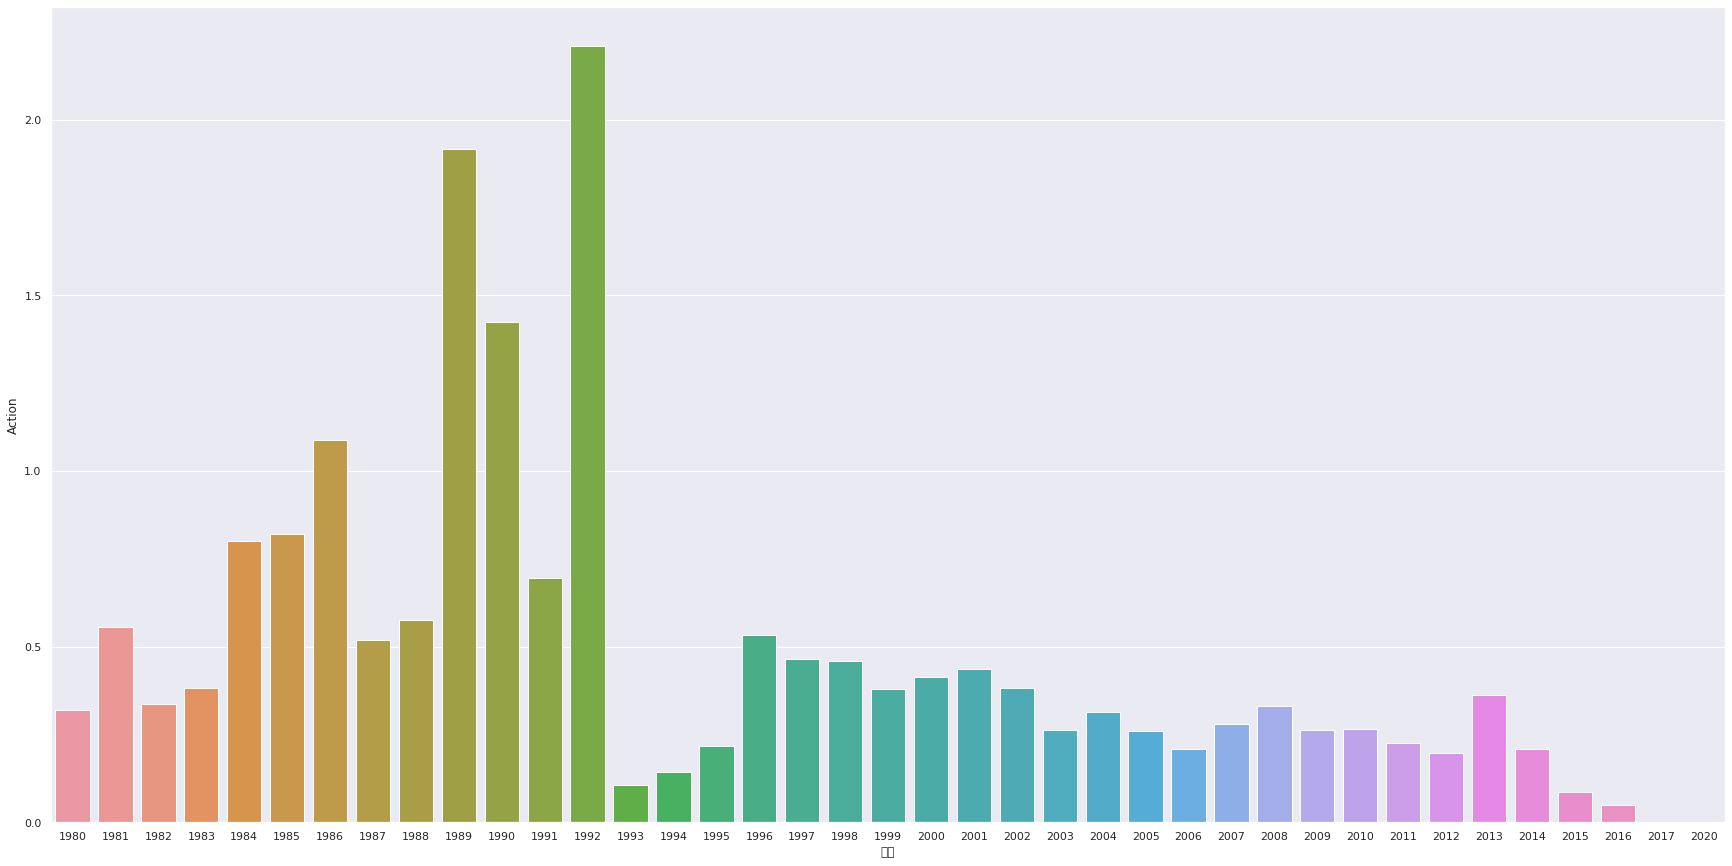

In [70]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Action')
#sns.barplot(data=gen_sales1, x='연도', y='Adventure')
#sns.barplot(data=gen_sales1, x='연도', y='Fighting')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


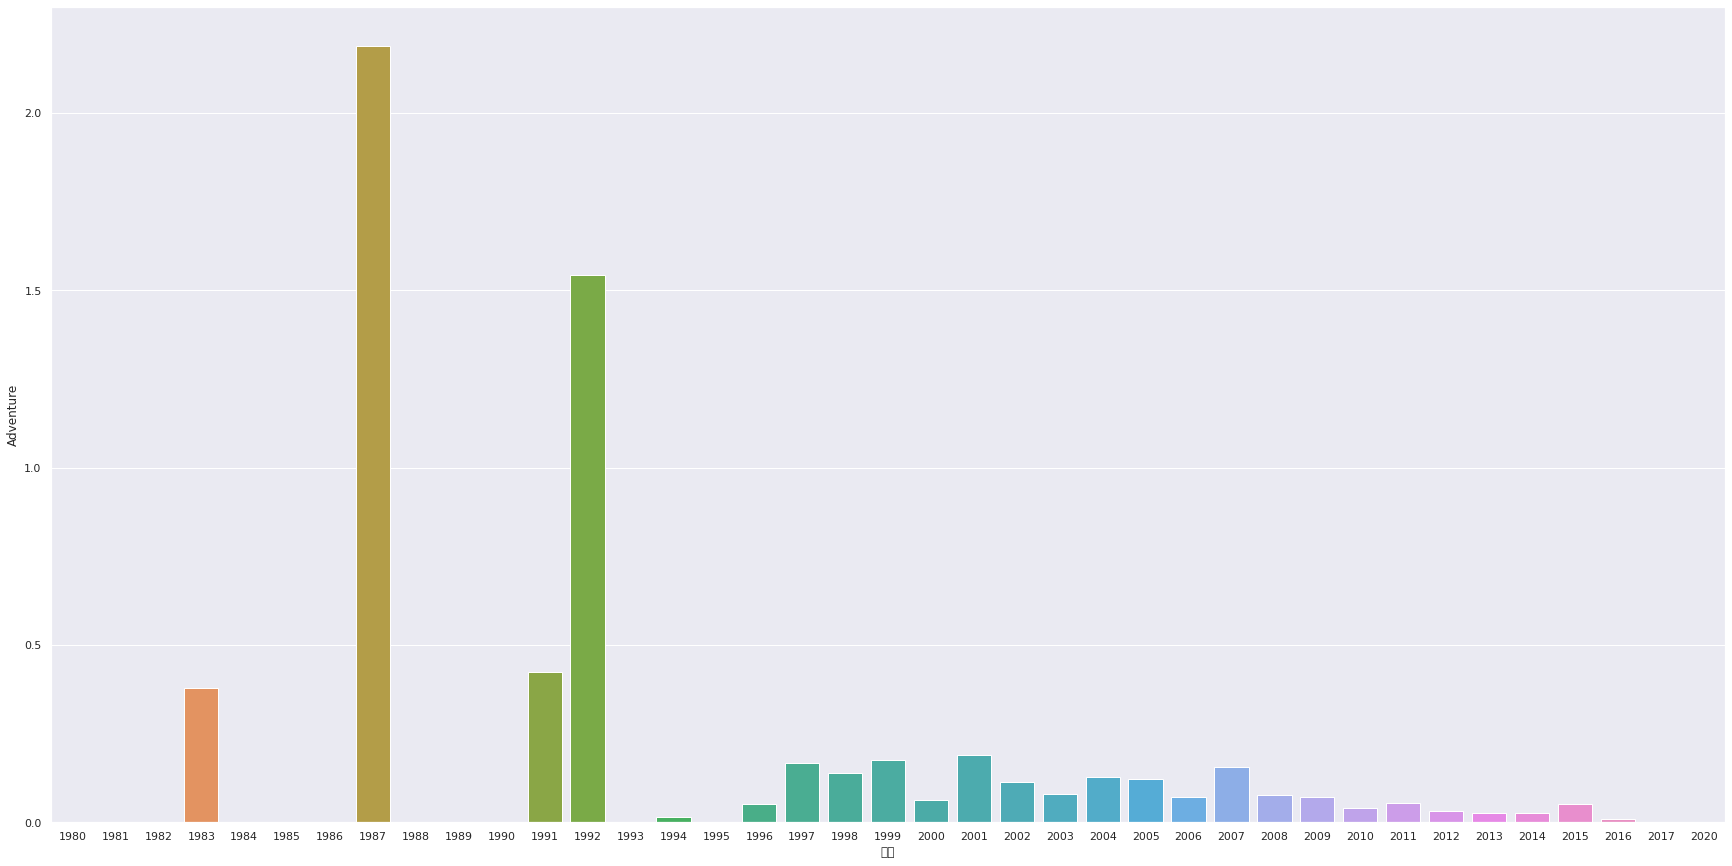

In [71]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Adventure')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


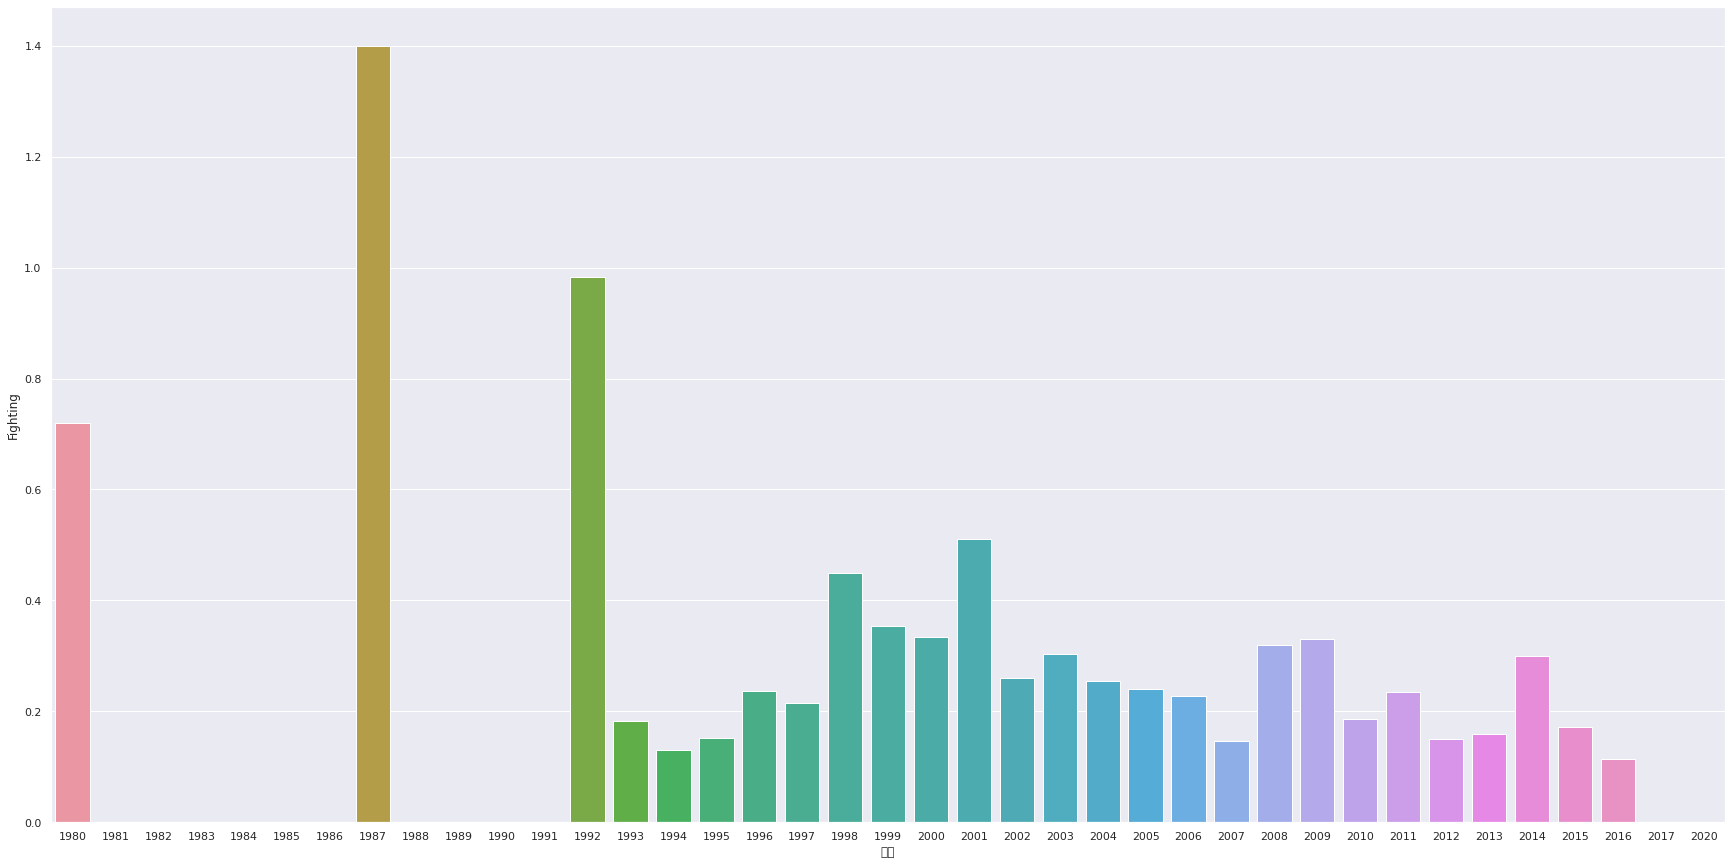

In [72]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Fighting')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


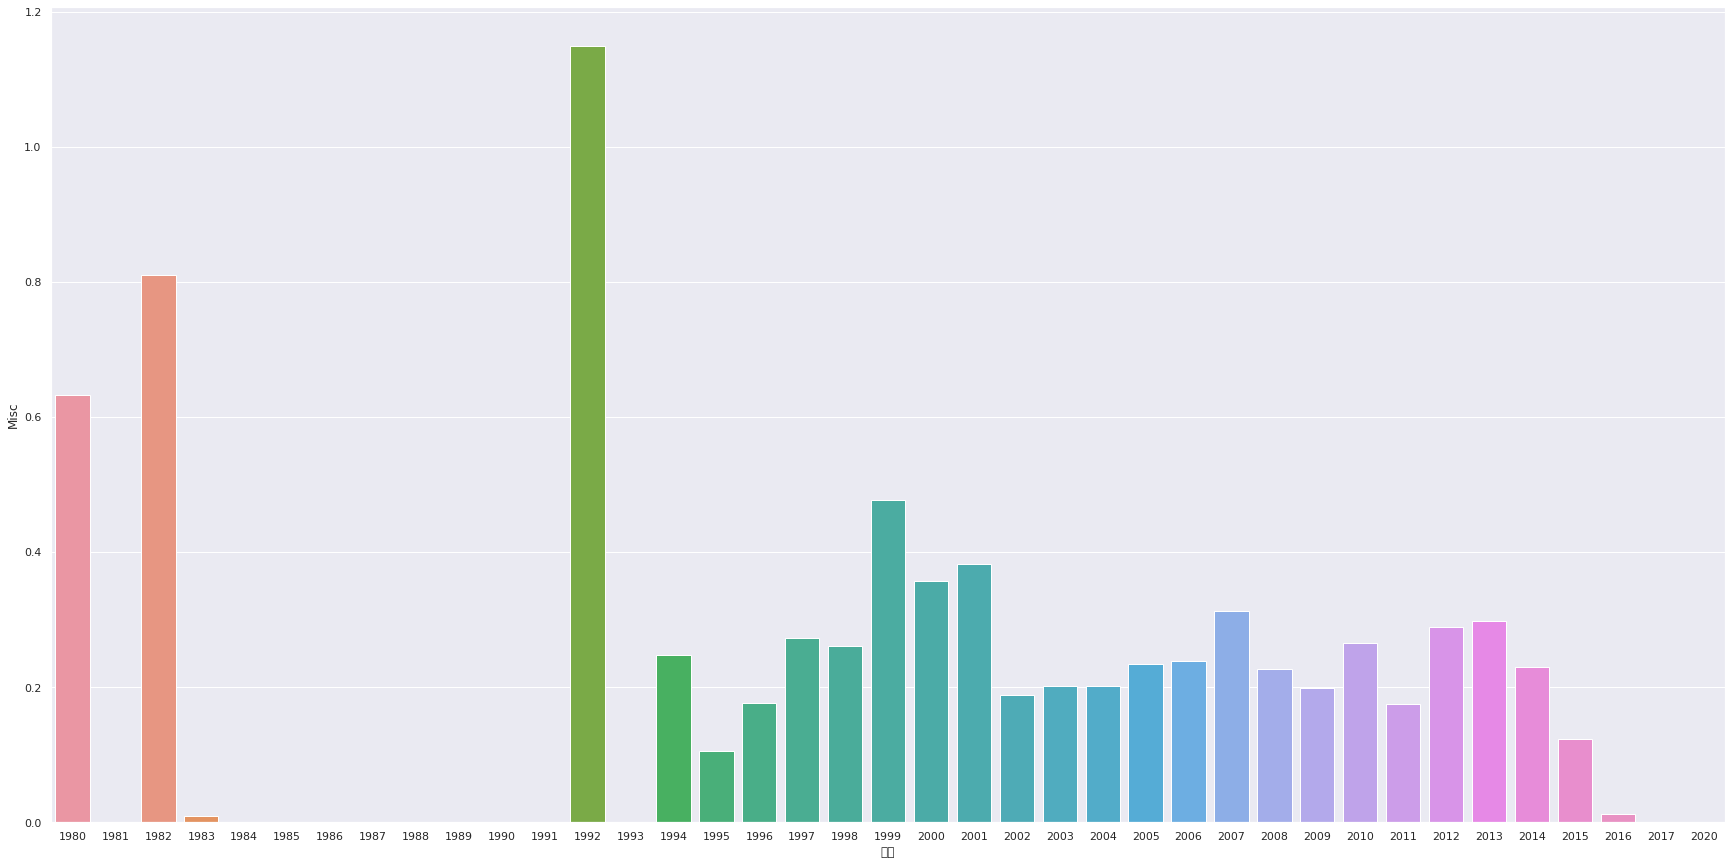

In [74]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Misc')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


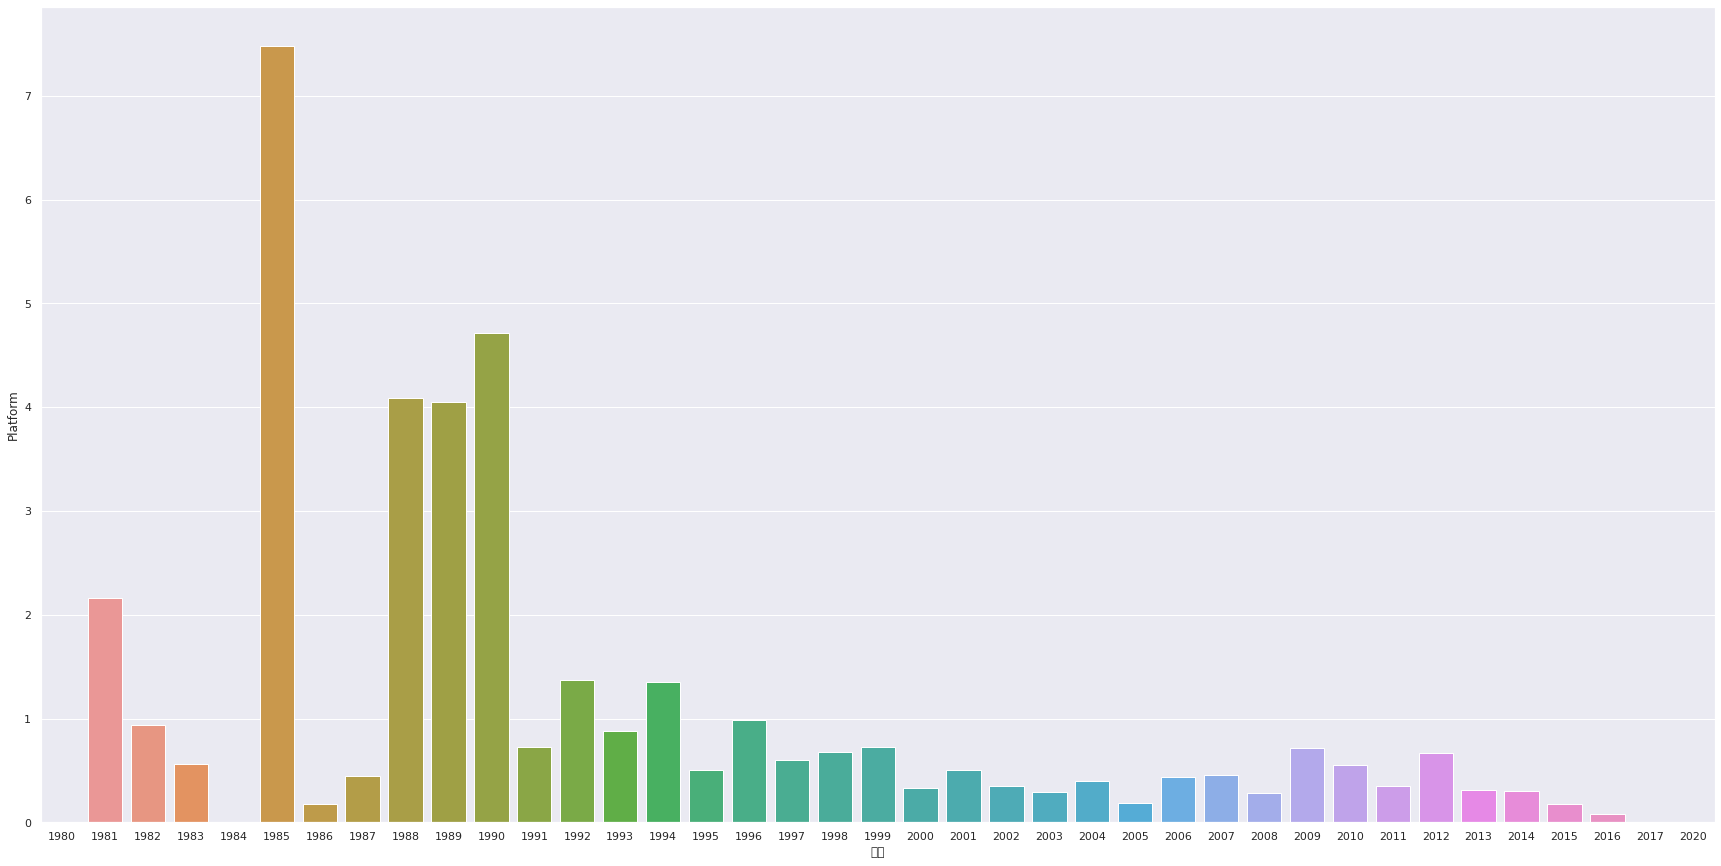

In [75]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Platform')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


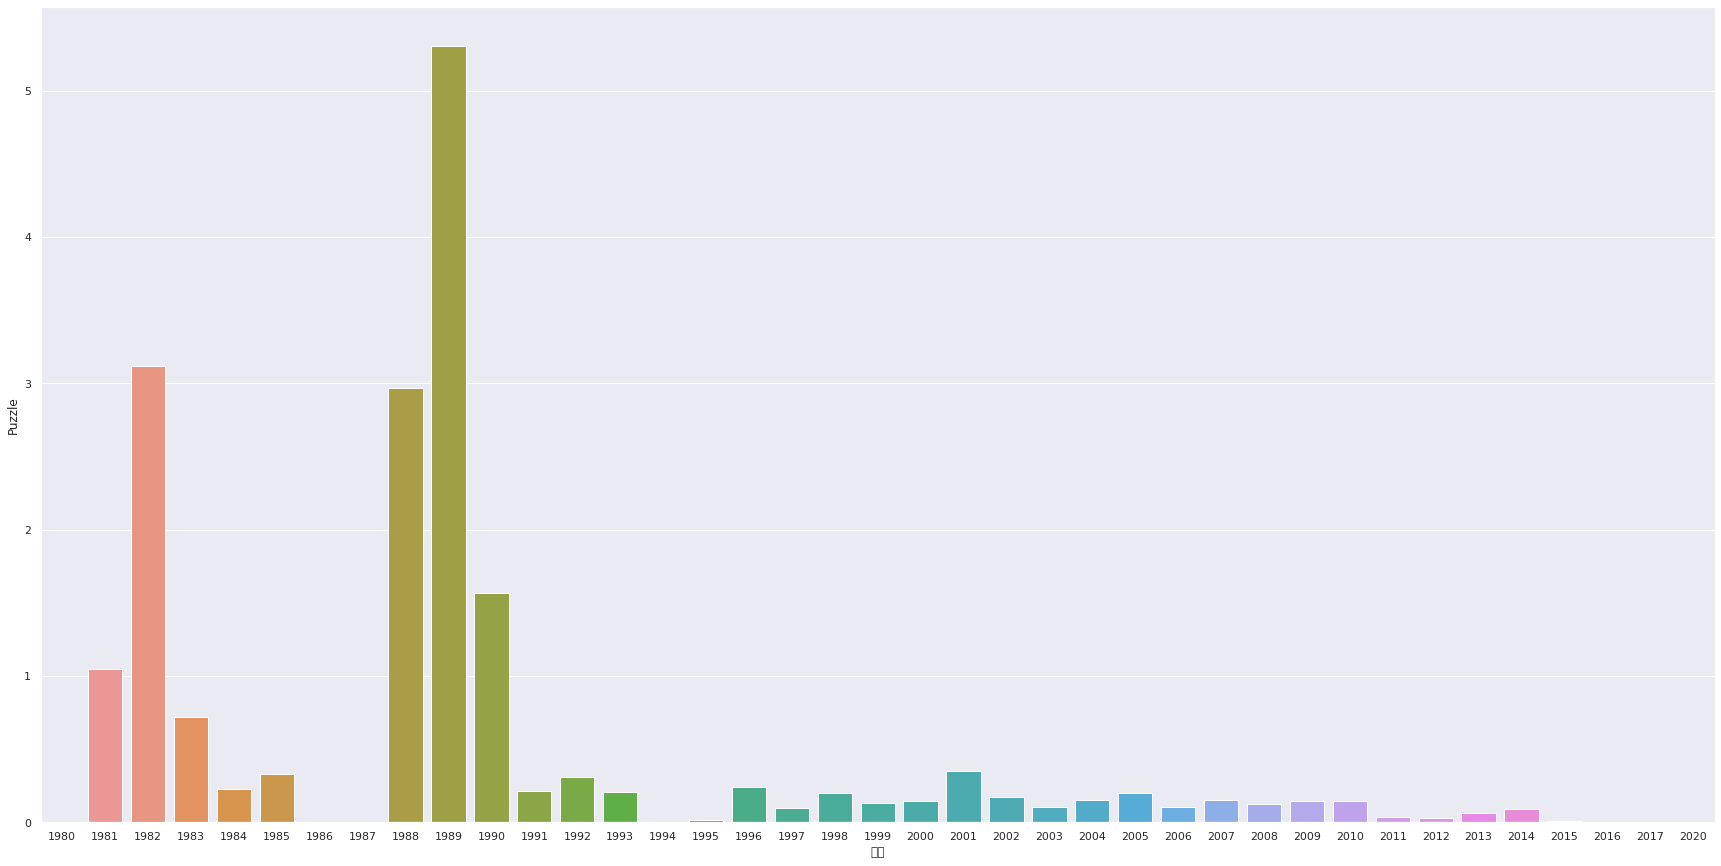

In [76]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Puzzle')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


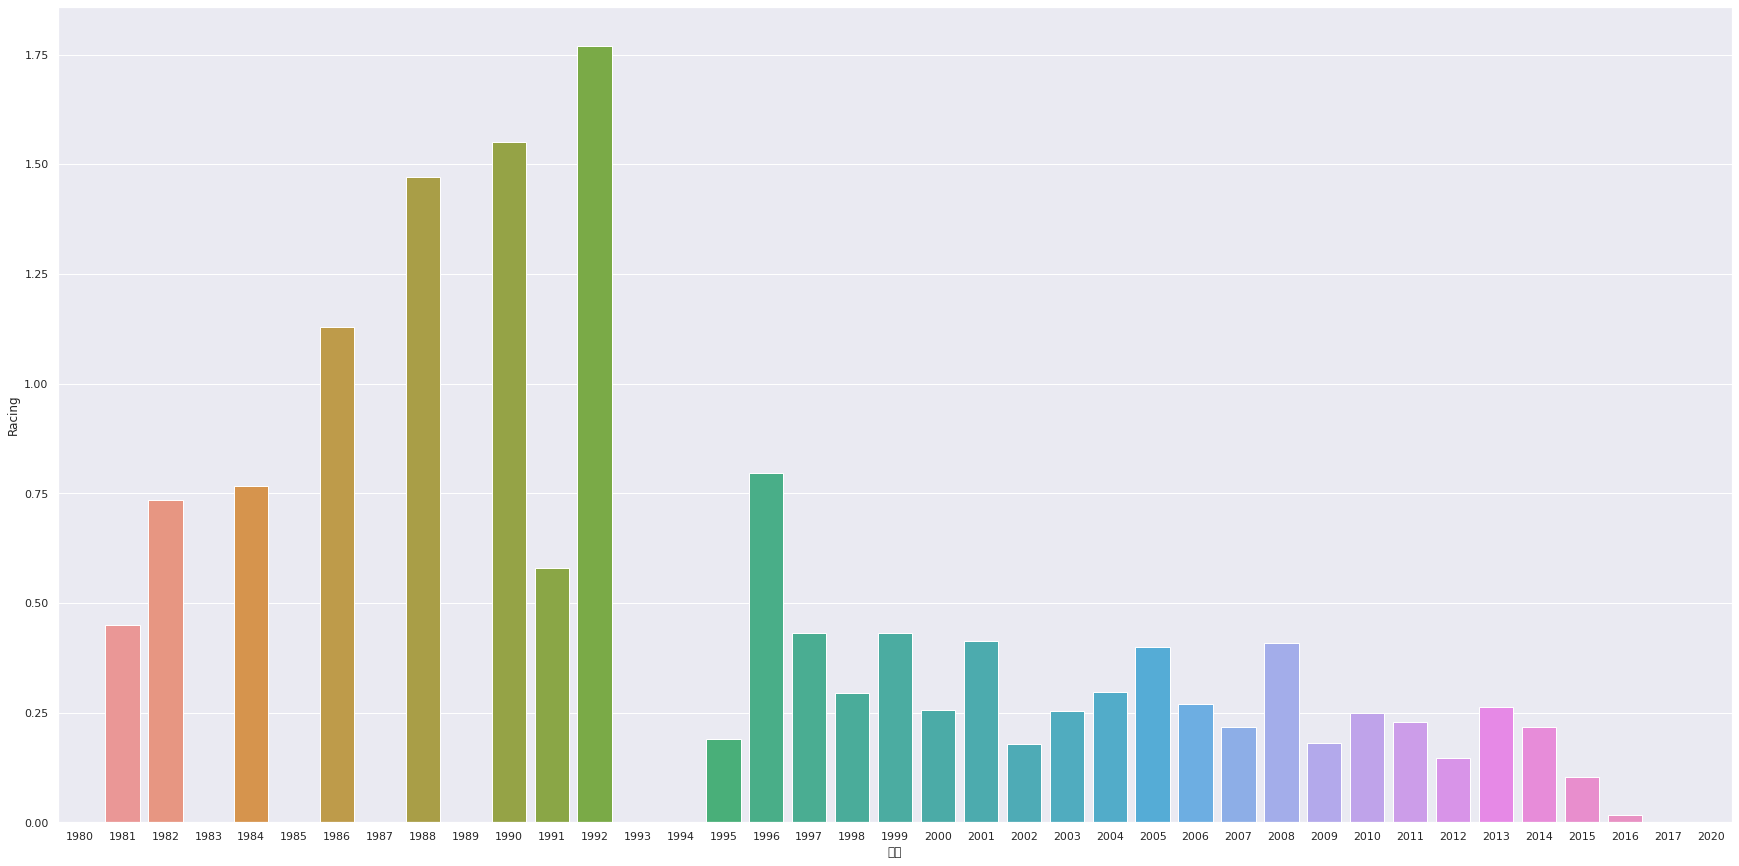

In [77]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Racing')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


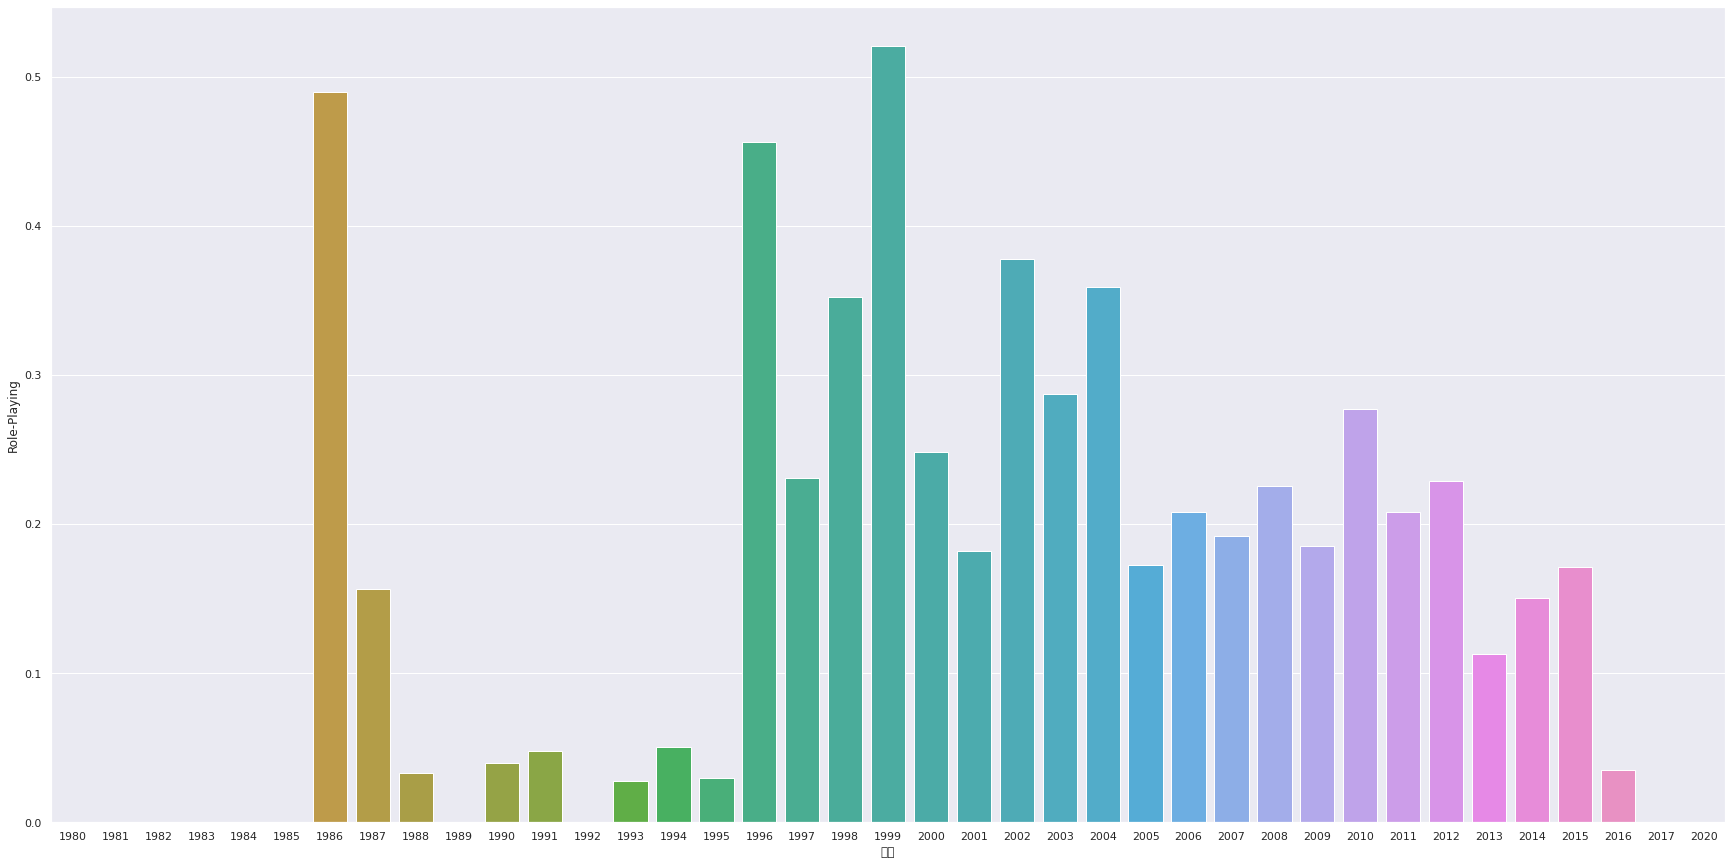

In [78]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Role-Playing')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


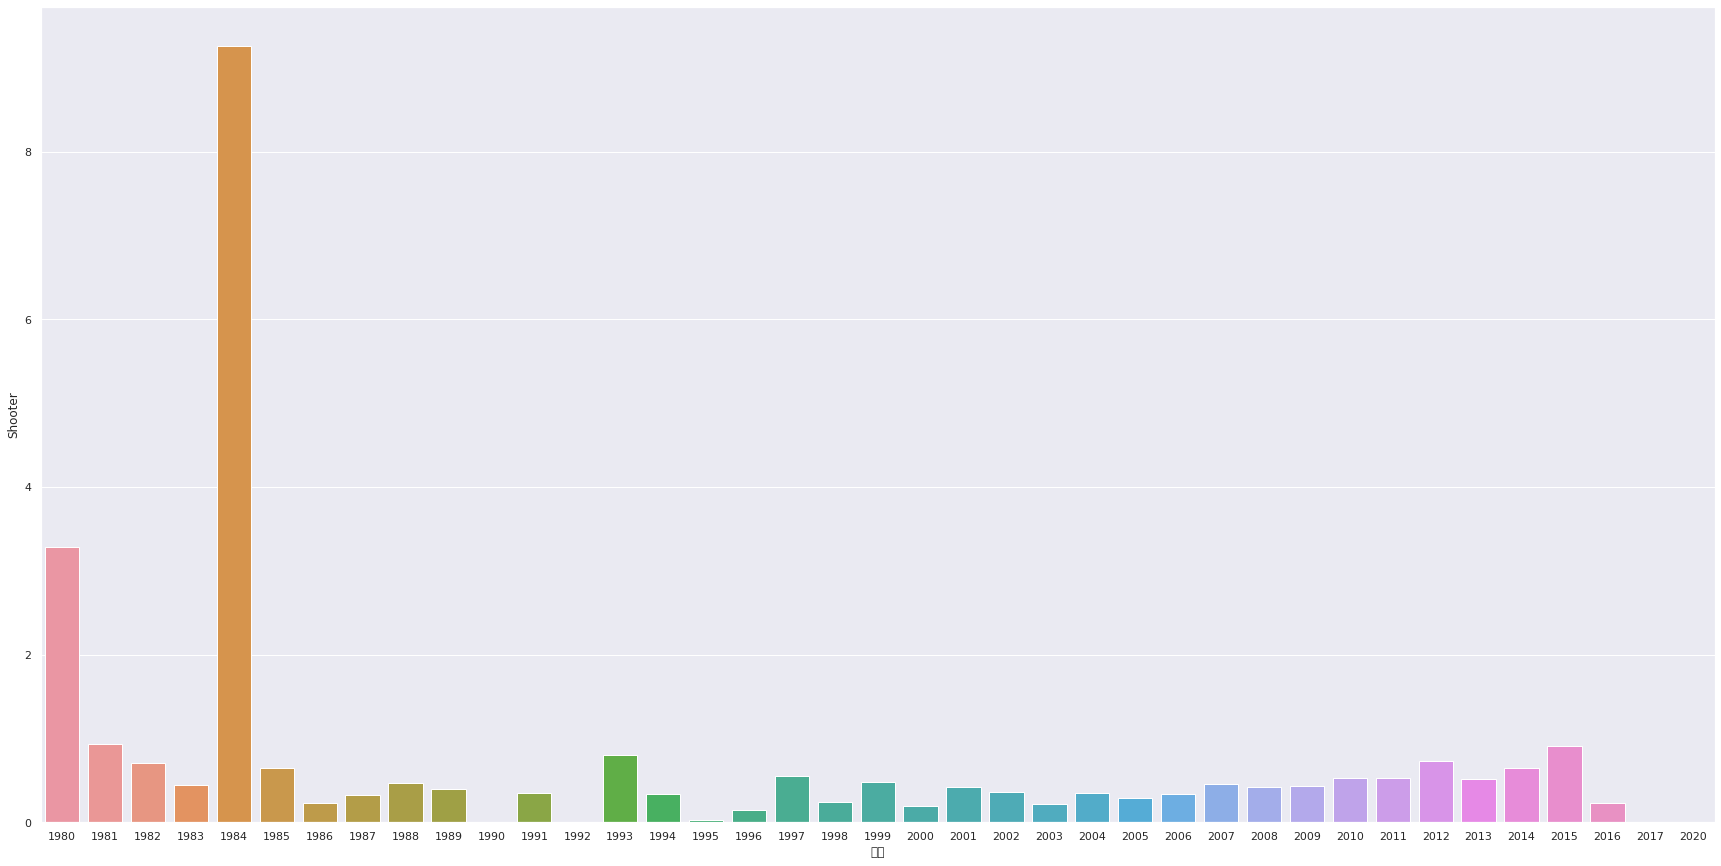

In [79]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Shooter')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


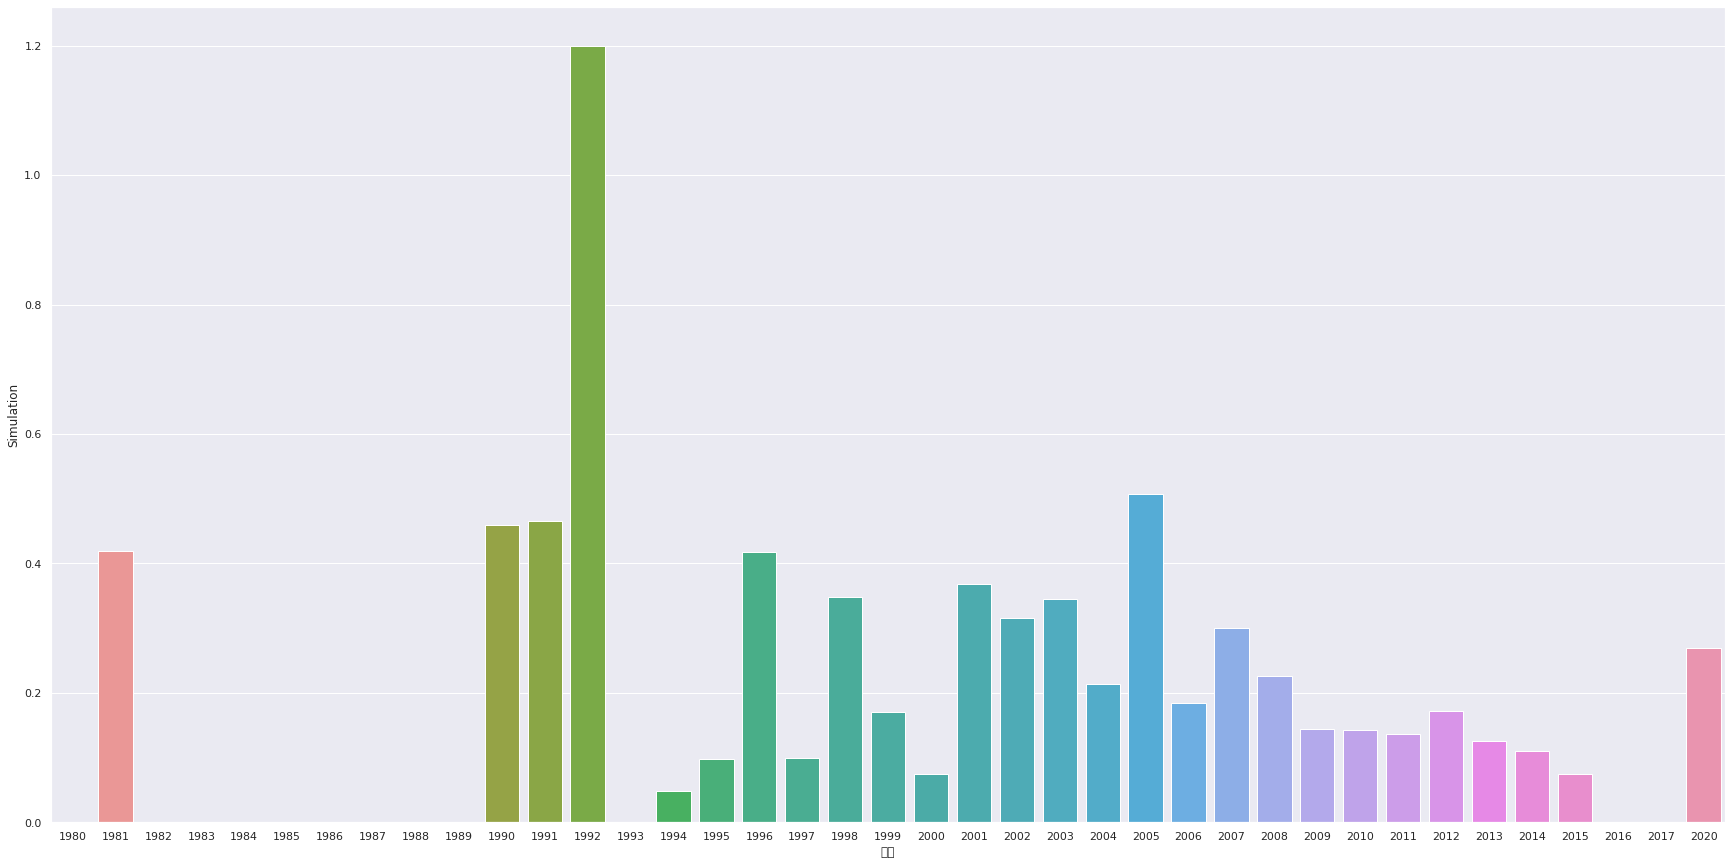

In [80]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Simulation')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


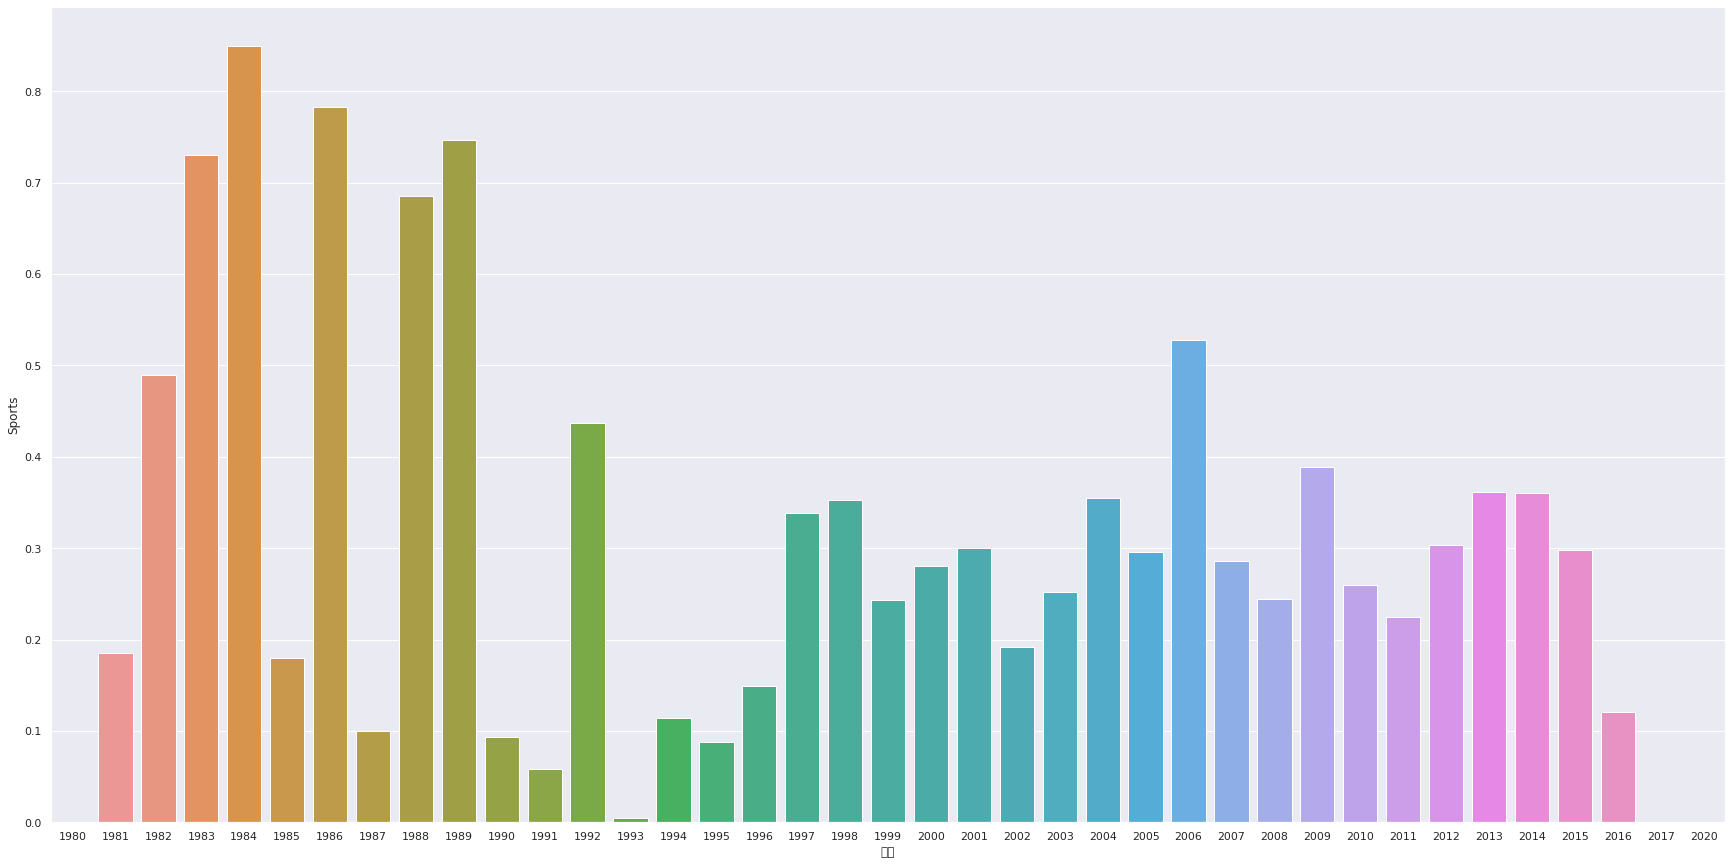

In [81]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Sports')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


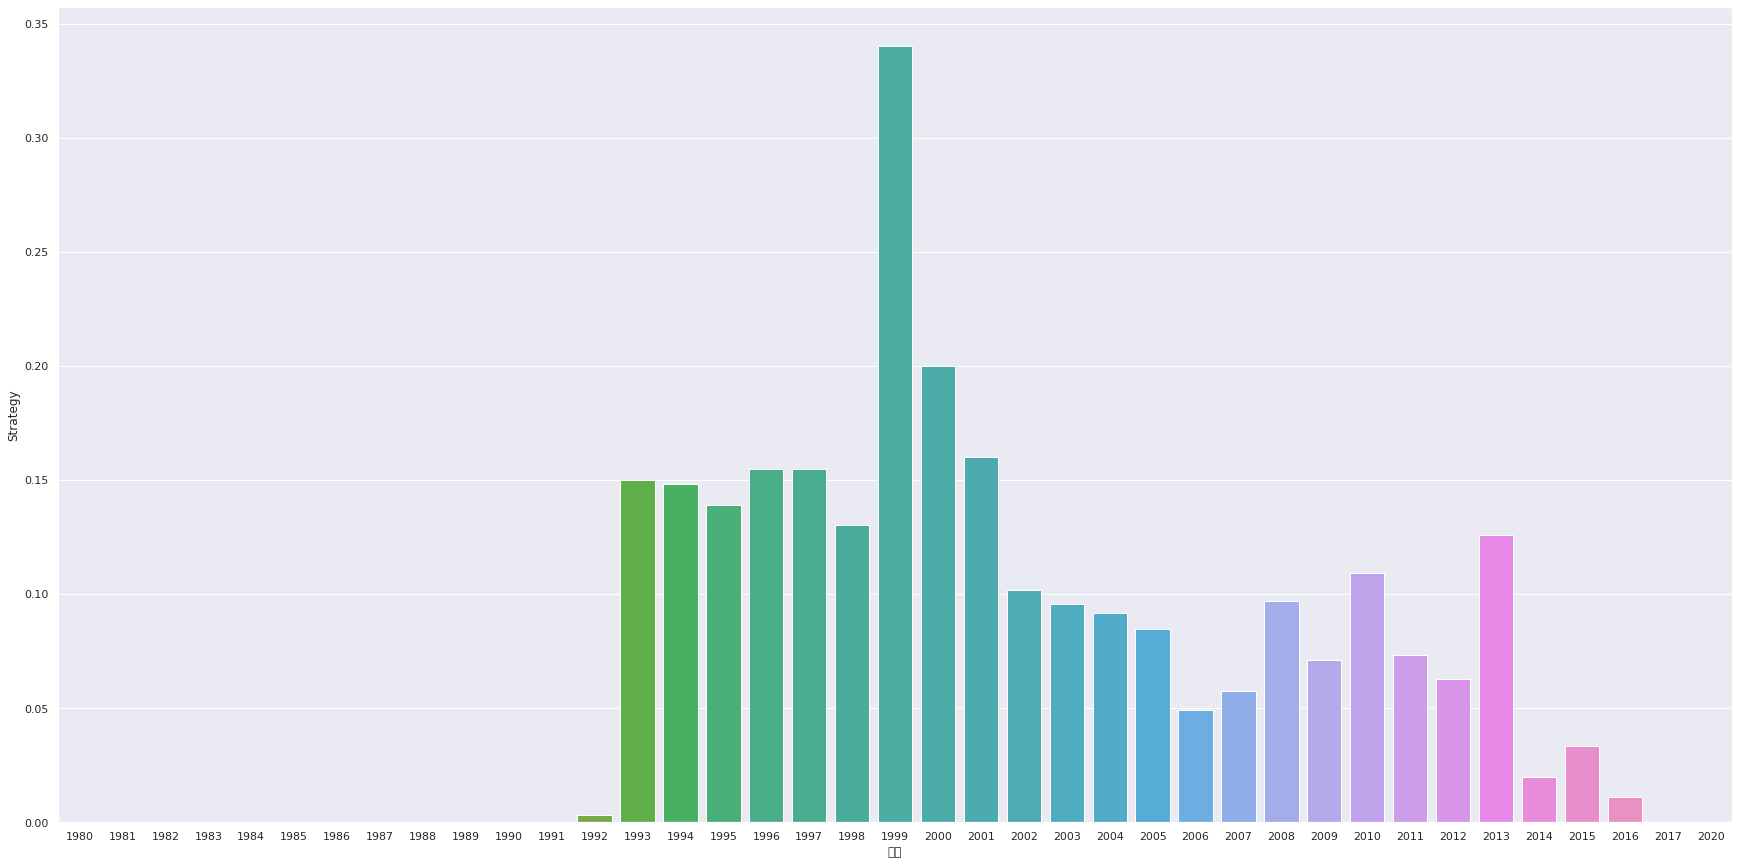

In [82]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales1, x='연도', y='Strategy')

# **일본 장르별 판매율(연도별 추이)**

In [83]:
gen_sales2 = year_df.pivot_table(values='일본', index='연도', columns='장르').fillna(0)

gen_sales2

장르,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
연도,,,,,,,,,,,,
1980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1983,0.000000,0.000000,0.000000,2.130000,0.724000,0.000000,0.000000,0.000000,0.000000,0.000000,2.350000,0.000000
1984,0.830000,0.000000,0.000000,1.450000,0.690000,0.743333,1.030000,0.000000,0.653333,0.000000,2.010000,0.000000
1985,0.720000,0.000000,1.050000,0.000000,2.167500,0.415000,0.000000,0.000000,0.210000,0.000000,1.530000,0.000000
1986,0.885000,0.000000,0.000000,0.000000,1.351667,0.000000,0.410000,0.520000,0.692500,0.000000,0.896667,0.000000
1987,0.000000,1.610000,0.935000,0.000000,0.345000,0.000000,0.000000,1.393333,0.000000,0.000000,0.820000,0.000000
1988,0.210000,0.000000,0.000000,0.000000,1.425000,1.810000,0.190000,1.926667,0.000000,0.000000,0.930000,0.000000


In [84]:
gen_sales2 = gen_sales2.reset_index()

gen_sales2

장르,연도,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1983,0.000000,0.000000,0.000000,2.130000,0.724000,0.000000,0.000000,0.000000,0.000000,0.000000,2.350000,0.000000
4,1984,0.830000,0.000000,0.000000,1.450000,0.690000,0.743333,1.030000,0.000000,0.653333,0.000000,2.010000,0.000000
5,1985,0.720000,0.000000,1.050000,0.000000,2.167500,0.415000,0.000000,0.000000,0.210000,0.000000,1.530000,0.000000
6,1986,0.885000,0.000000,0.000000,0.000000,1.351667,0.000000,0.410000,0.520000,0.692500,0.000000,0.896667,0.000000
7,1987,0.000000,1.610000,0.935000,0.000000,0.345000,0.000000,0.000000,1.393333,0.000000,0.000000,0.820000,0.000000
8,1988,0.210000,0.000000,0.000000,0.000000,1.425000,1.810000,0.190000,1.926667,0.000000,0.000000,0.930000,0.000000
9,1989,0.155000,0.000000,0.000000,1.280000,1.656667,1.354000,0.000000,1.100000,0.360000,0.000000,0.823333,0.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


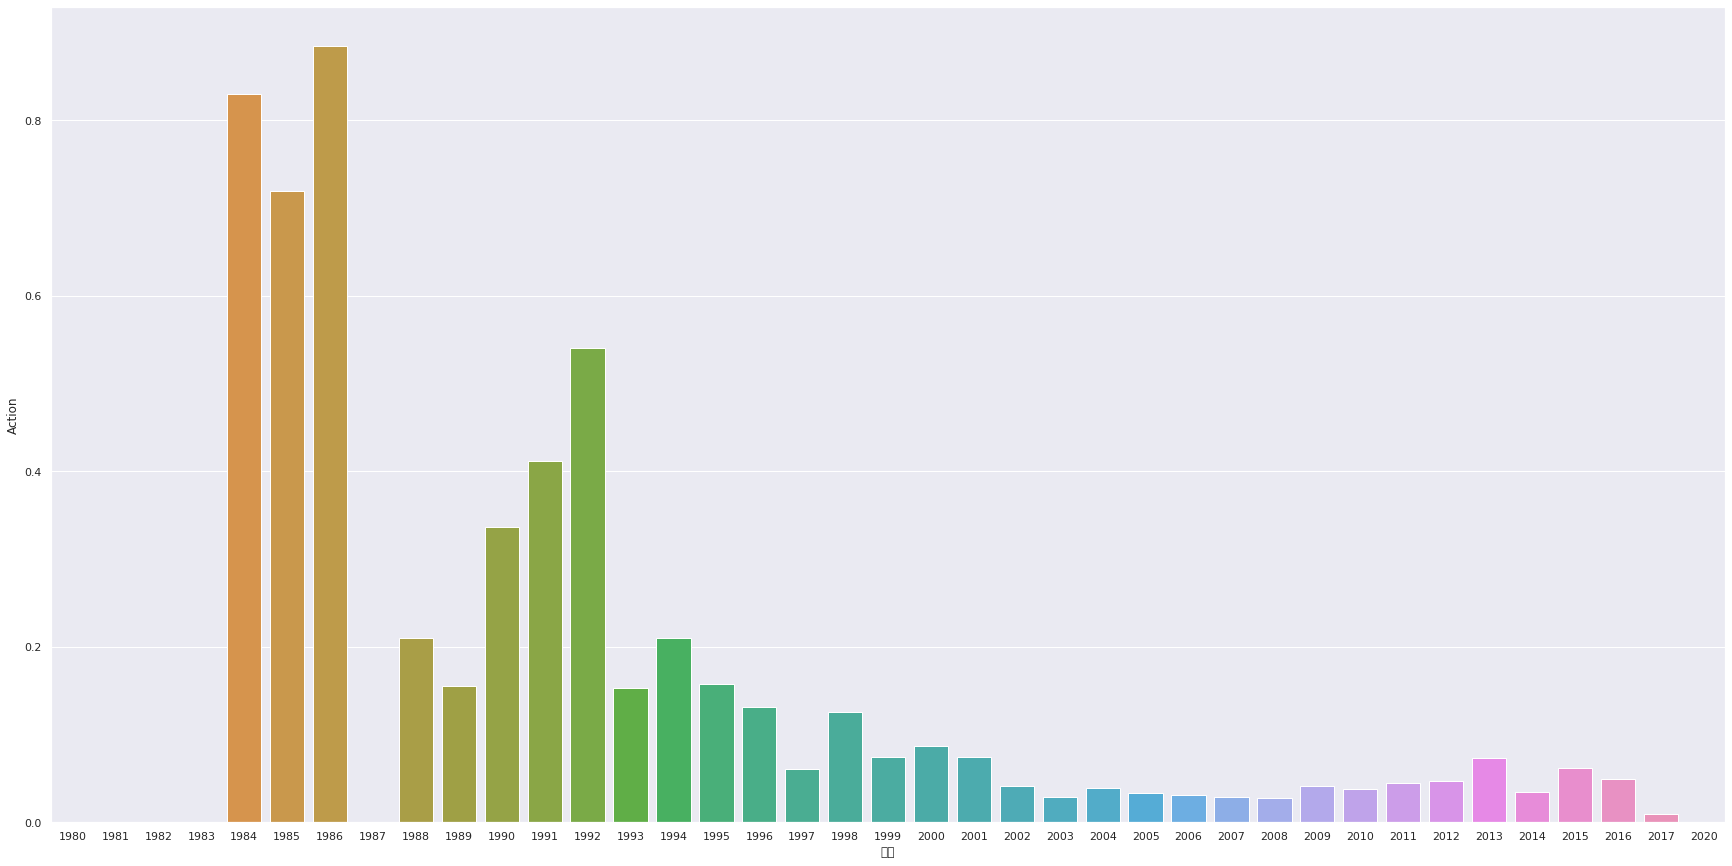

In [85]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Action')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


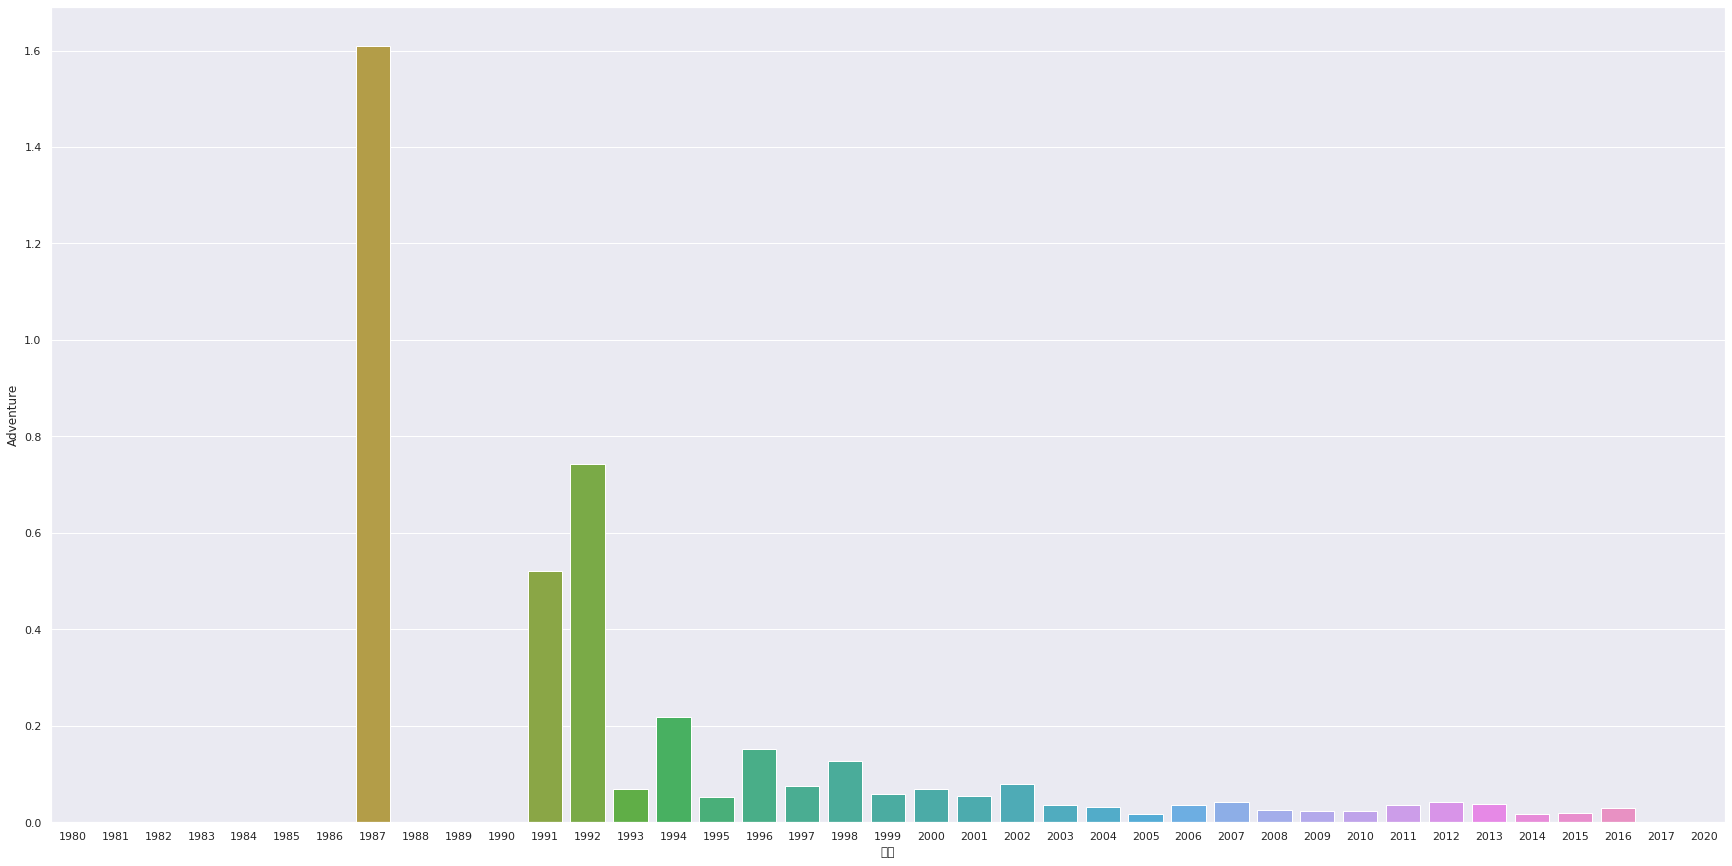

In [86]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Adventure')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


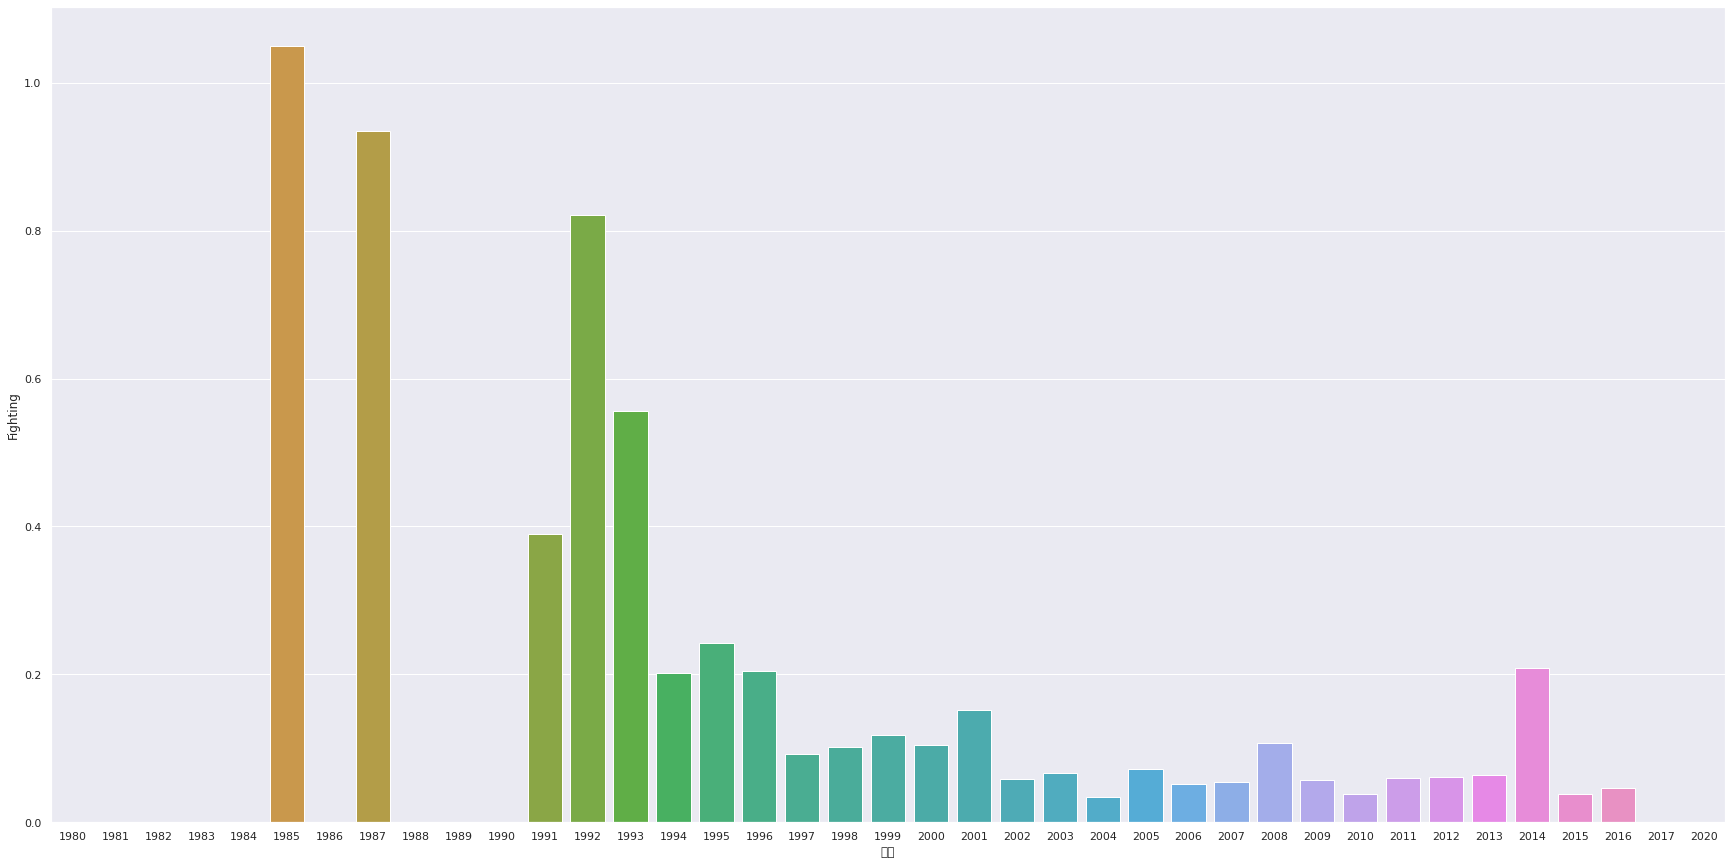

In [87]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Fighting')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


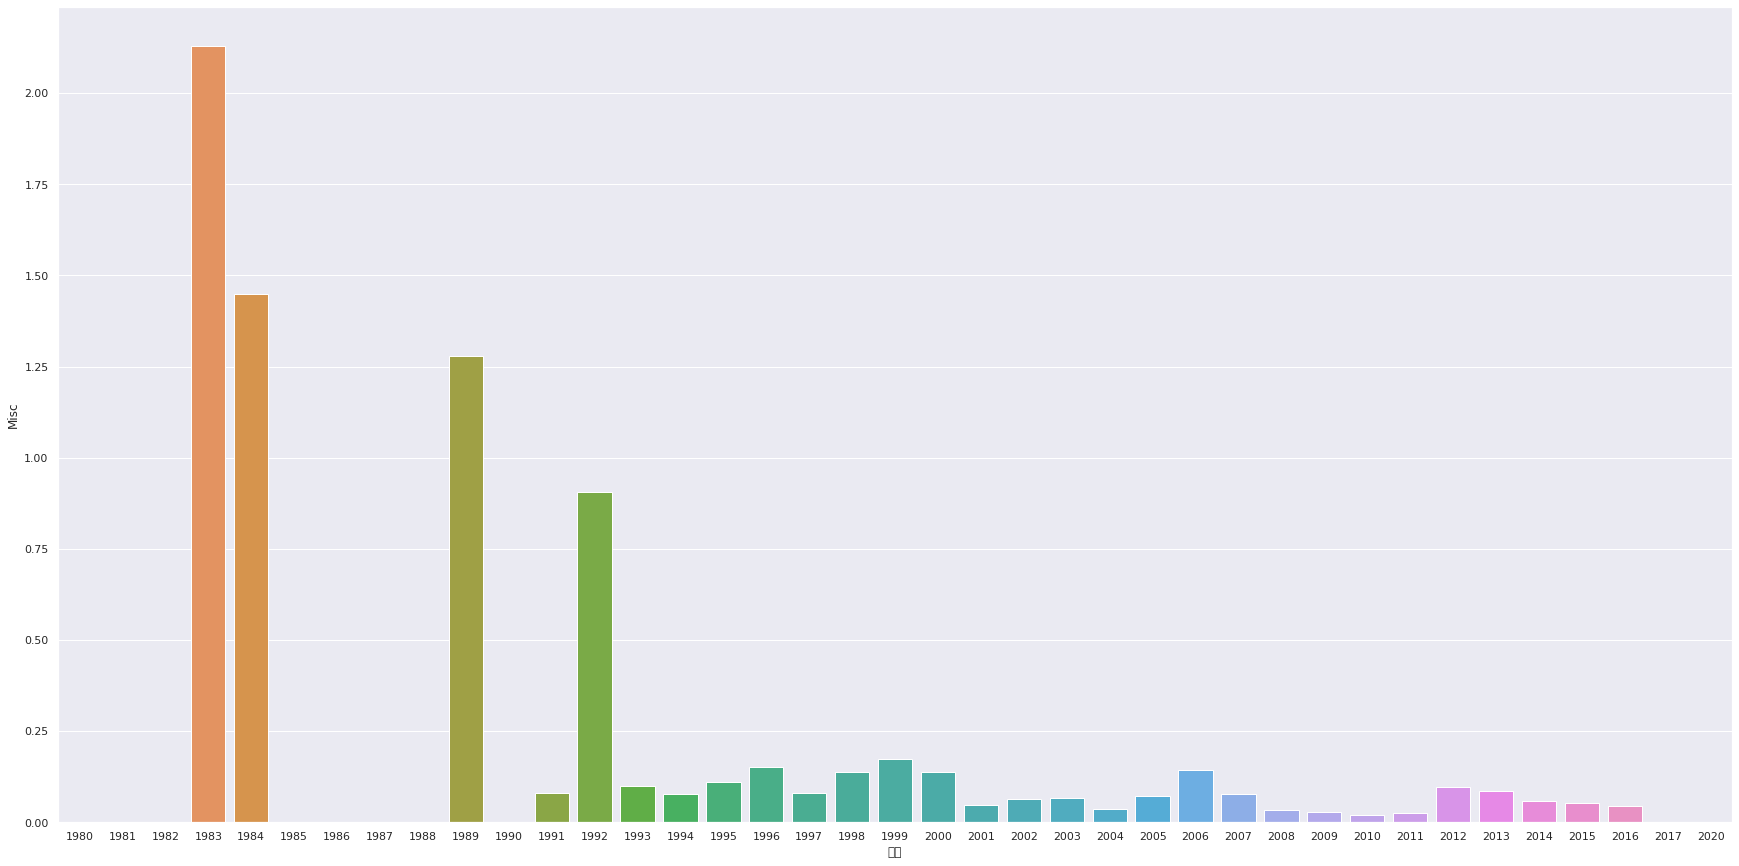

In [88]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Misc')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


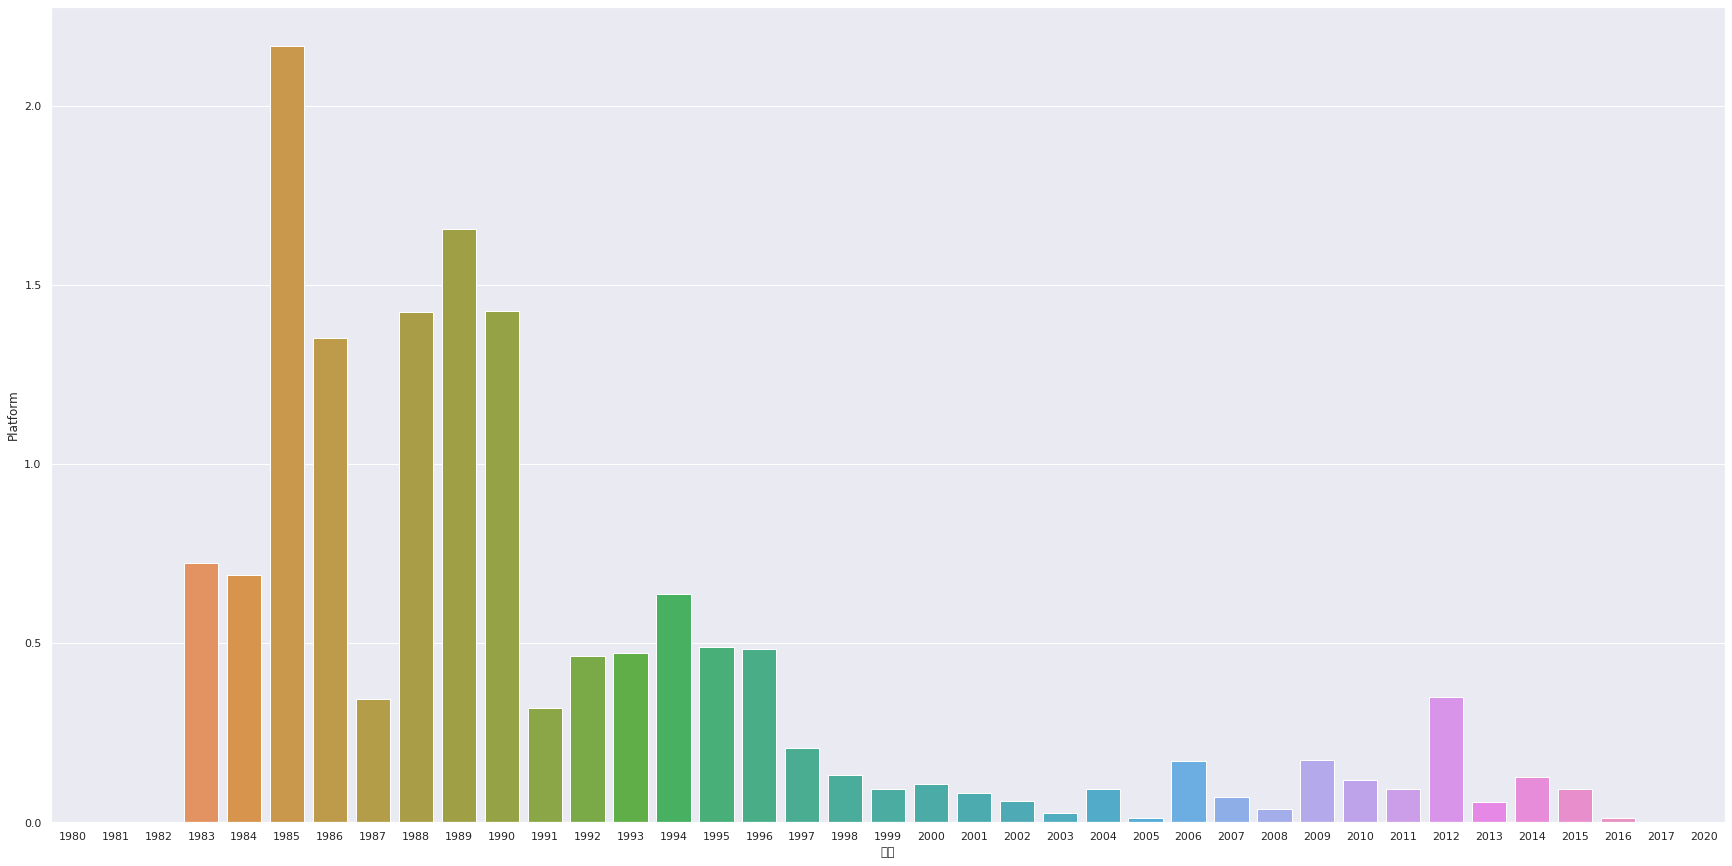

In [89]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Platform')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


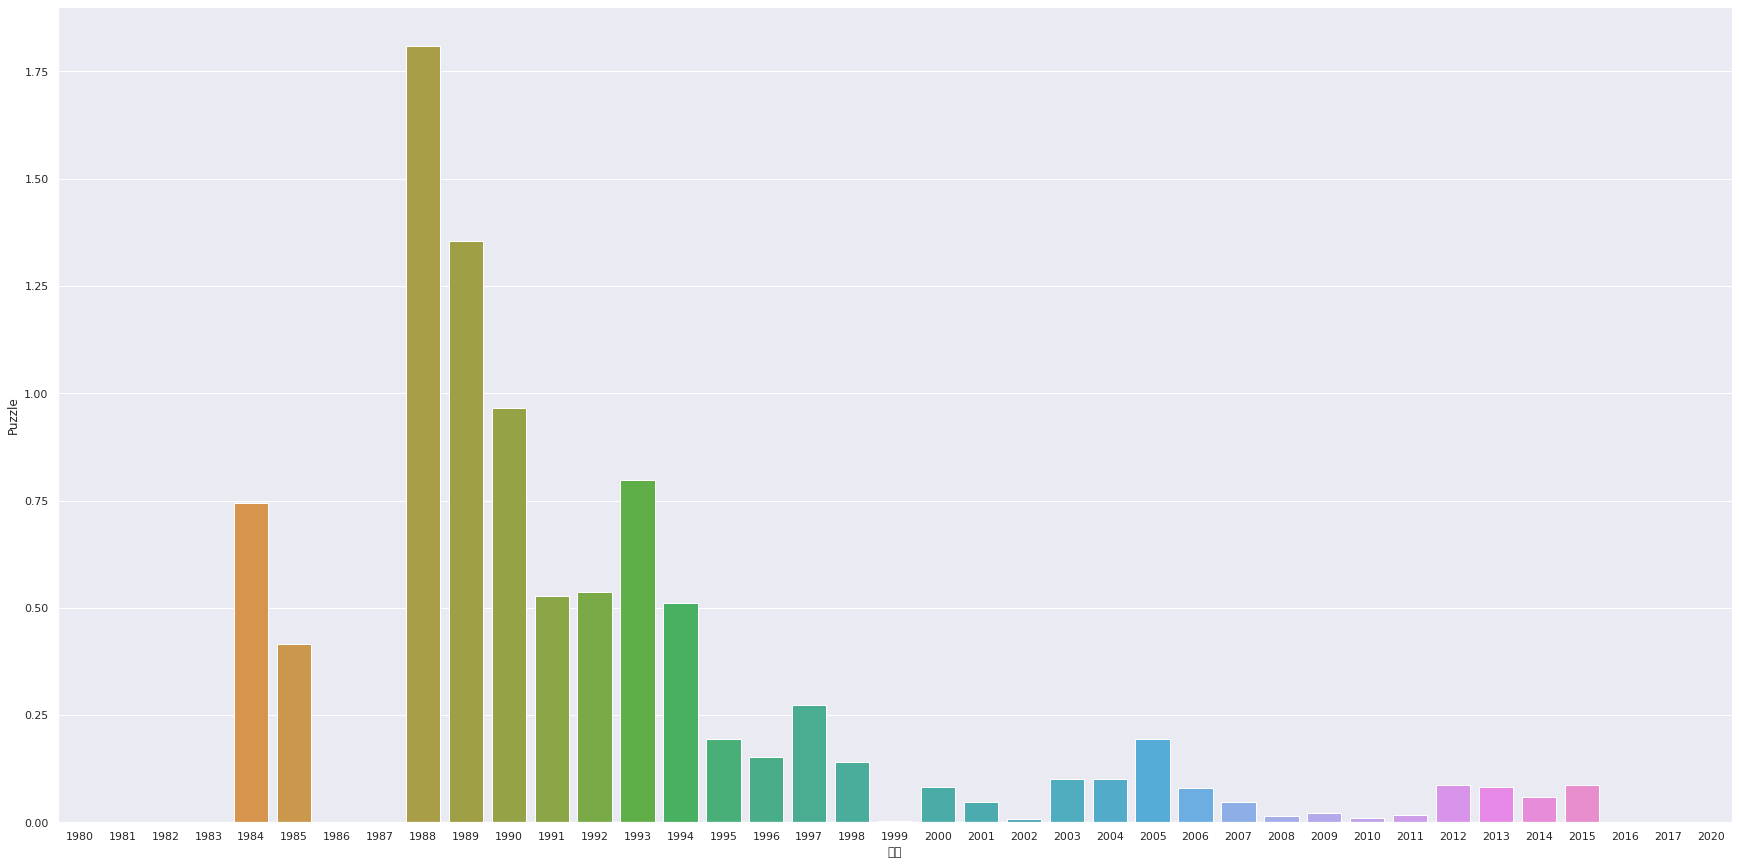

In [90]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Puzzle')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


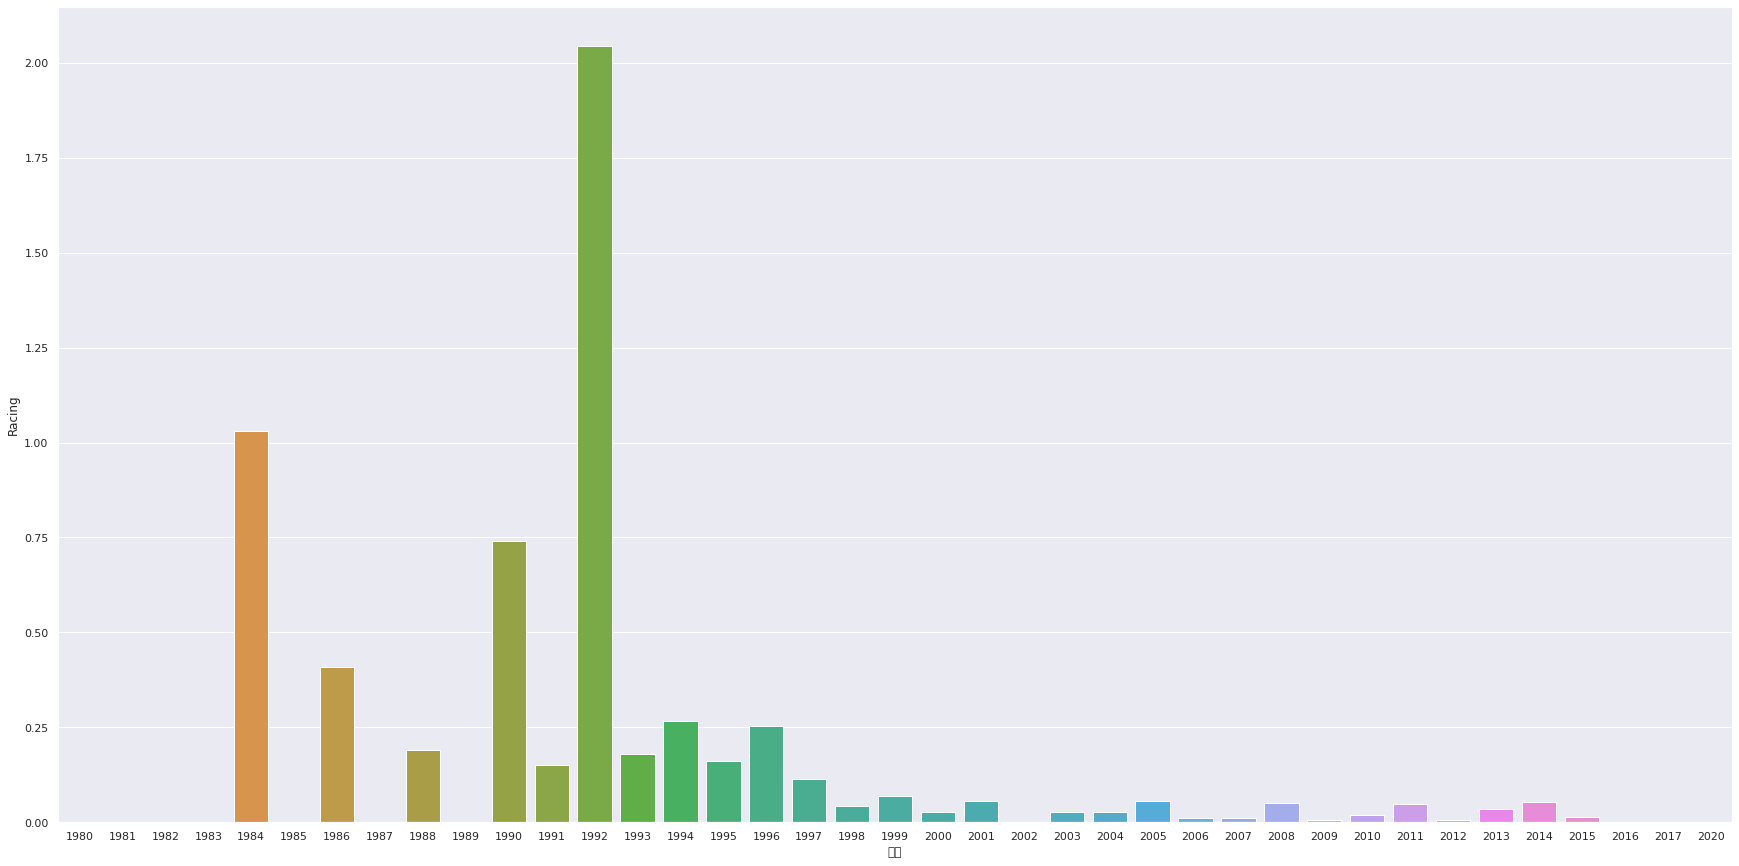

In [91]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Racing')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


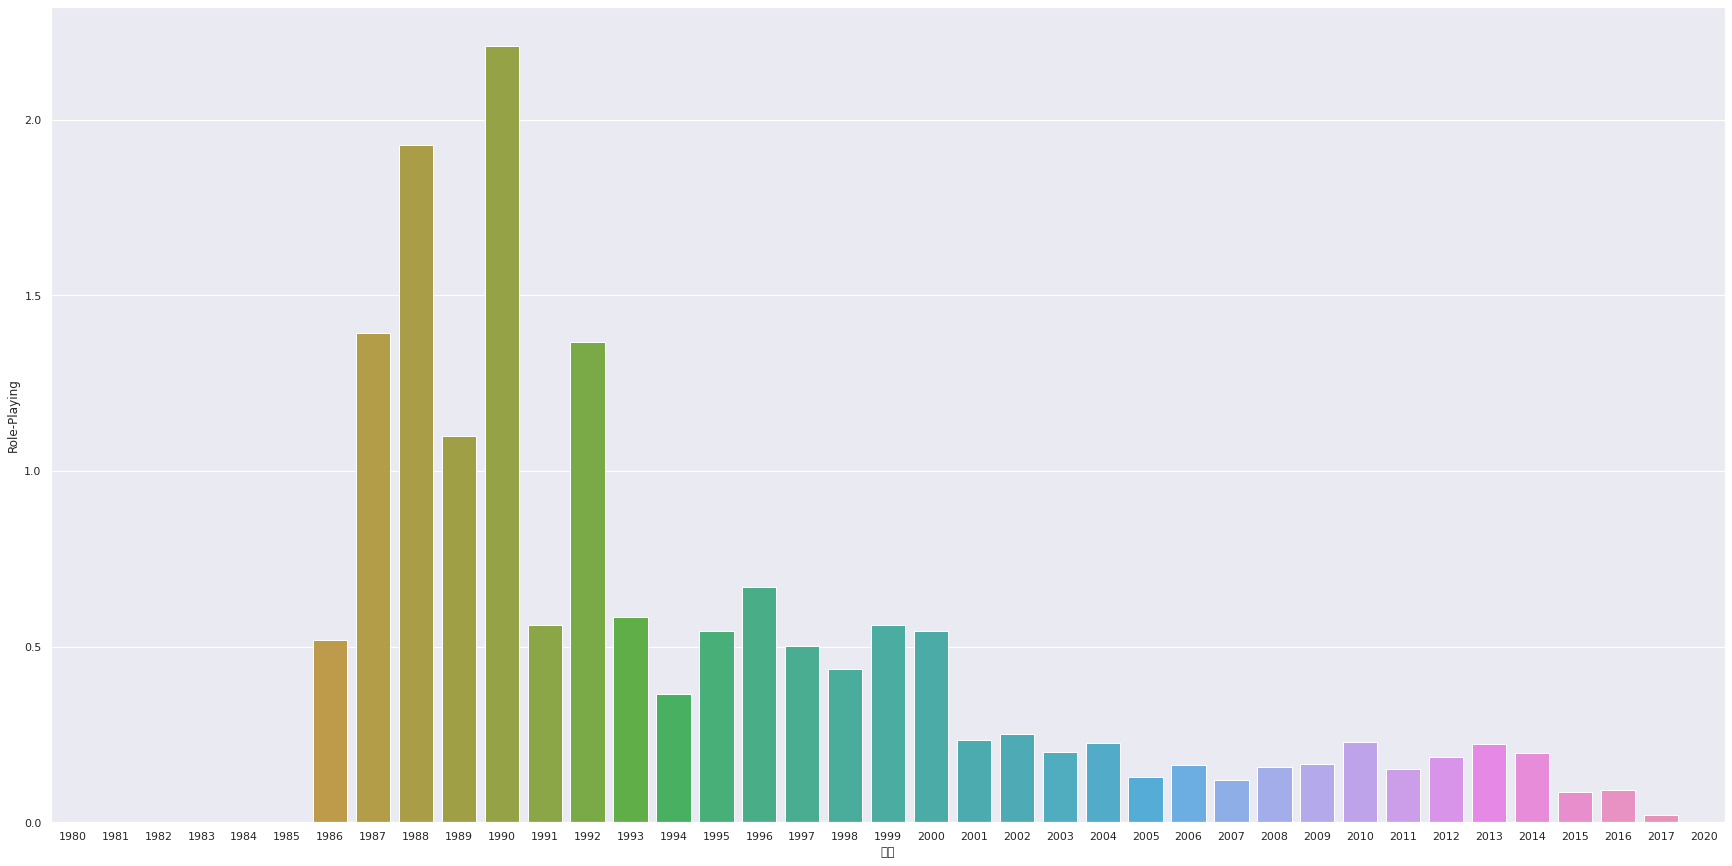

In [92]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Role-Playing')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


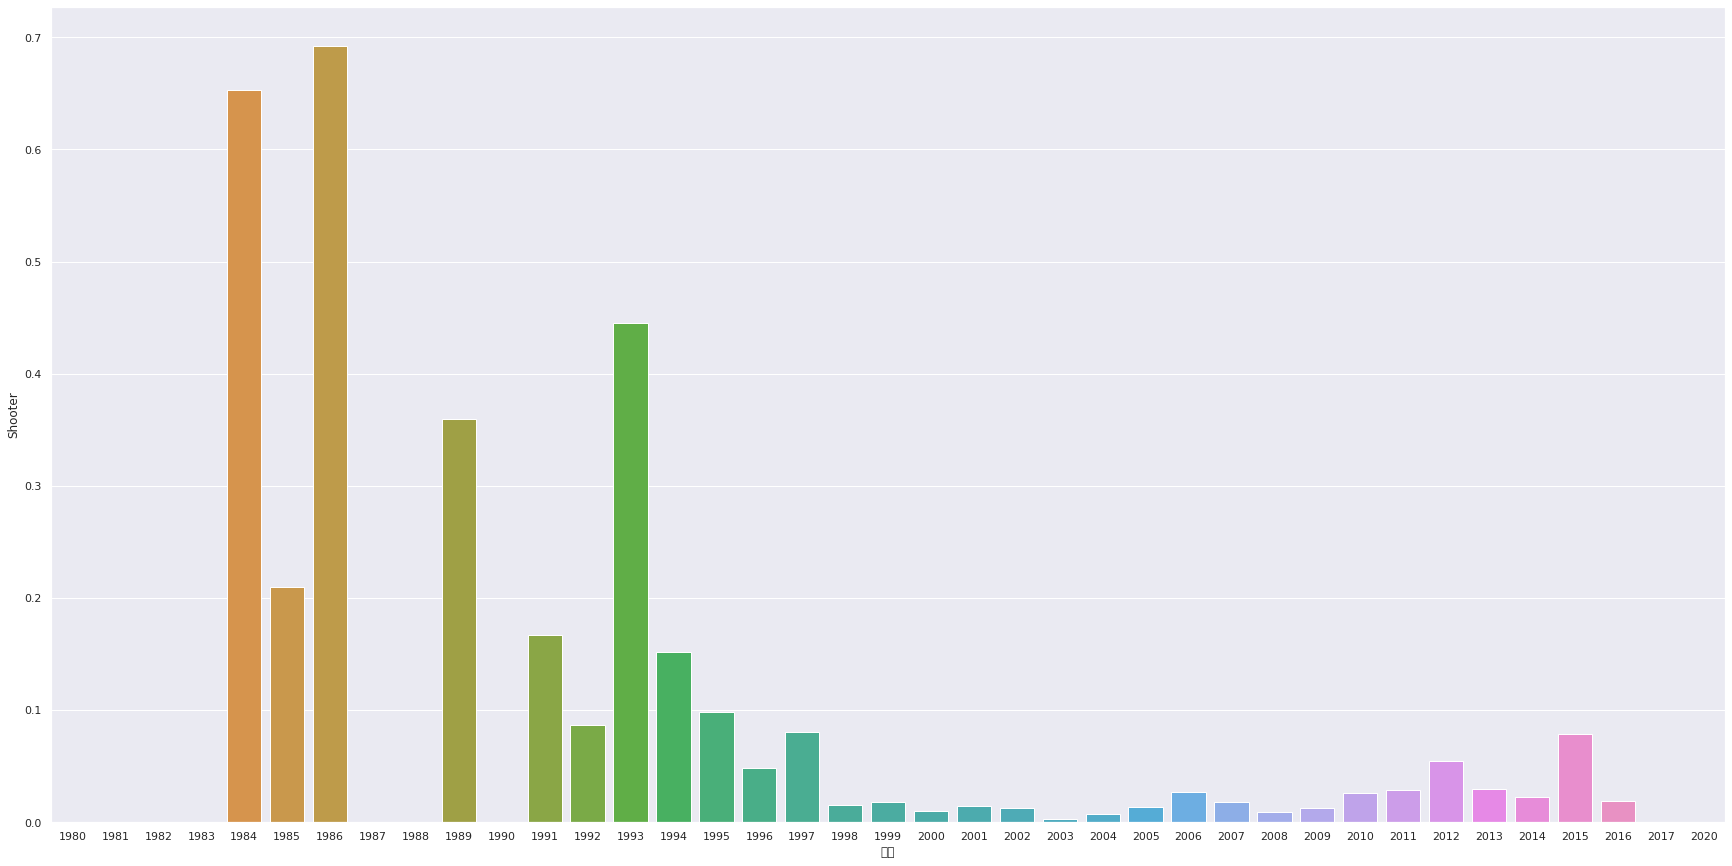

In [93]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Shooter')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


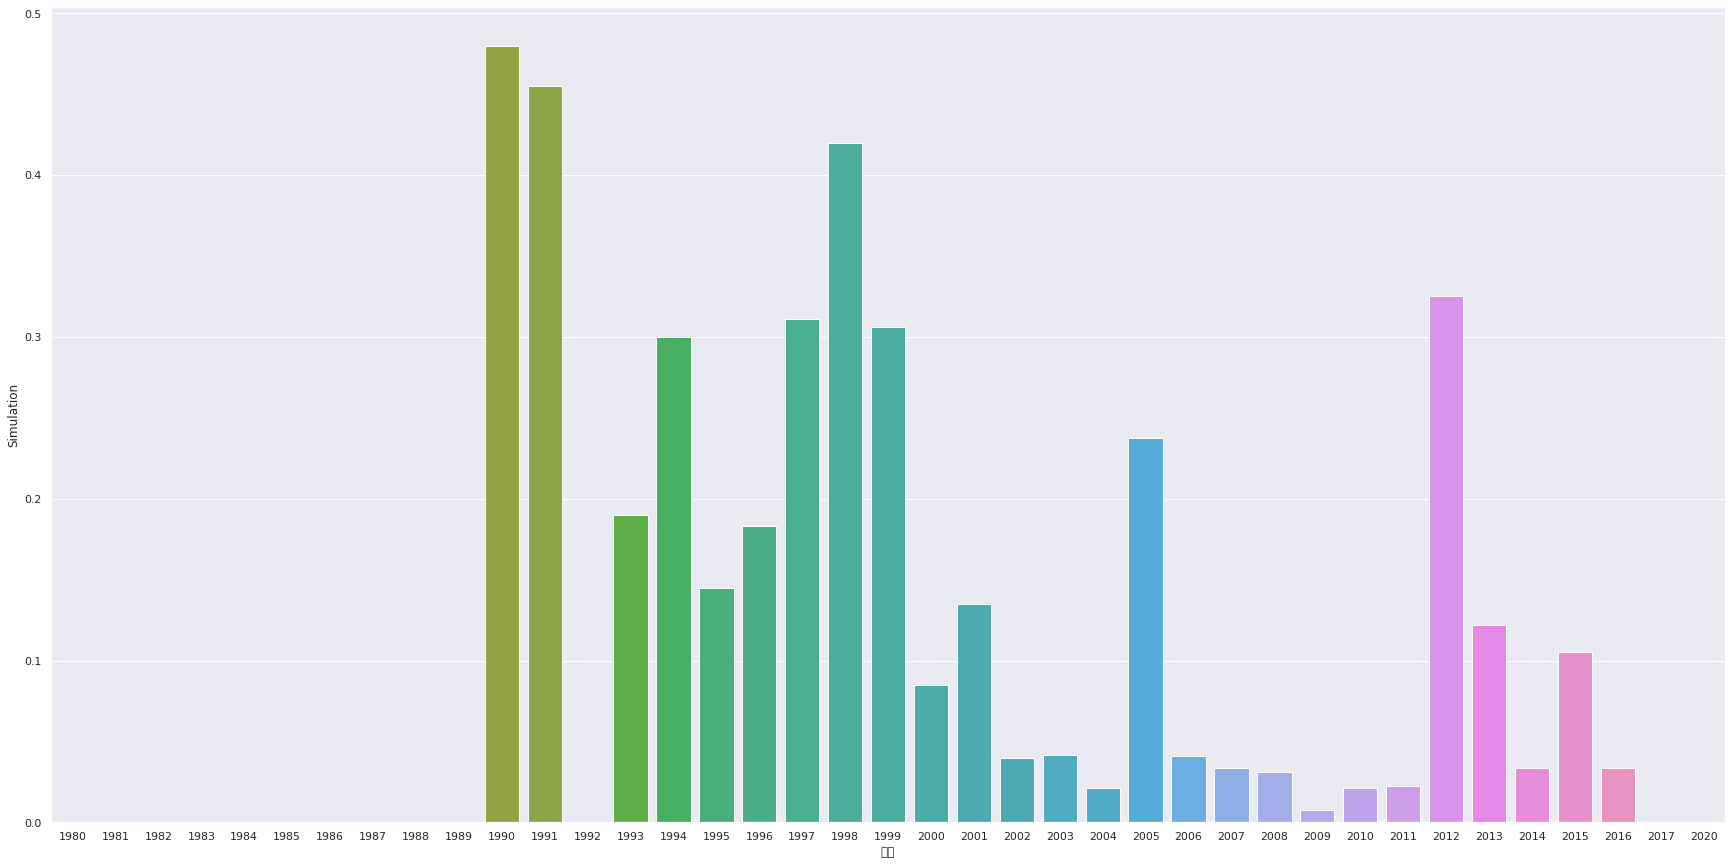

In [94]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Simulation')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


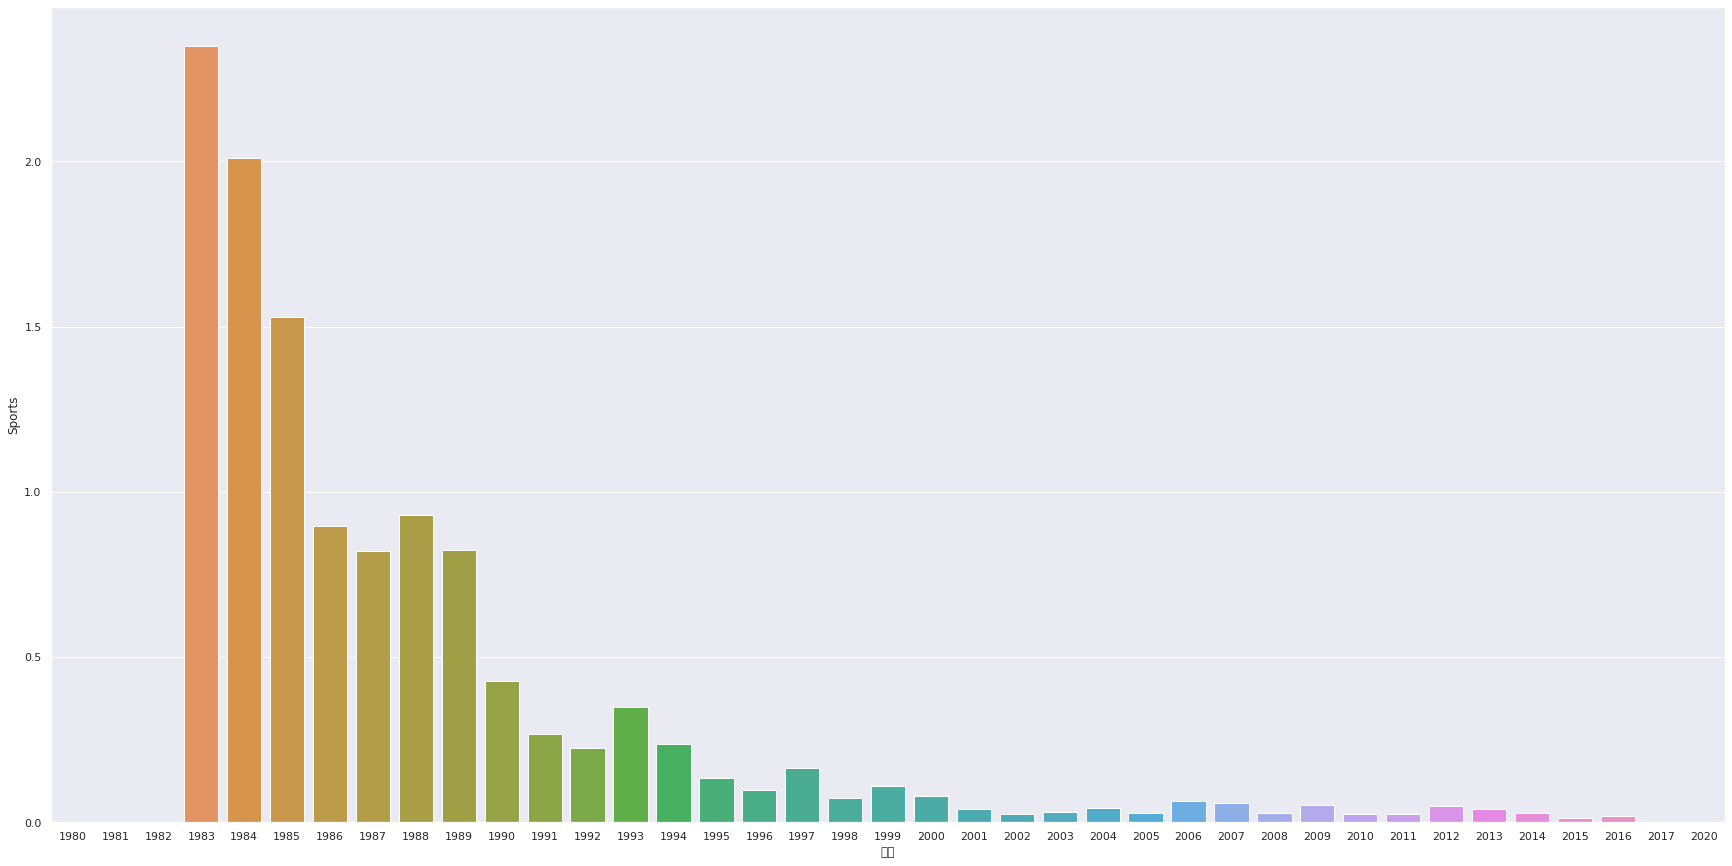

In [95]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Sports')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


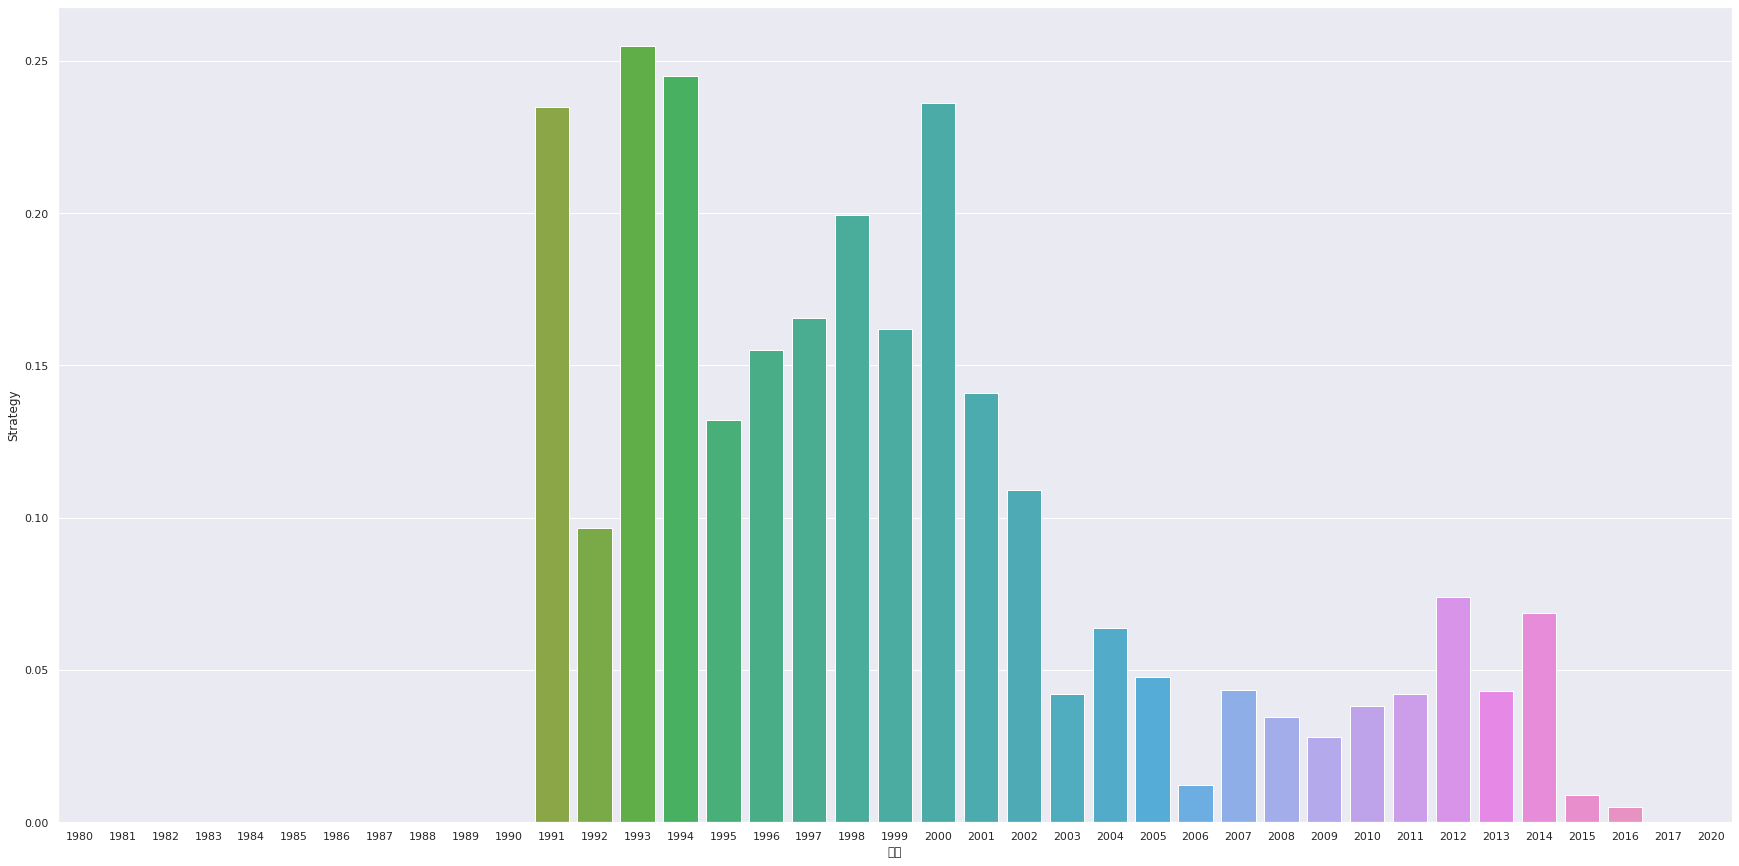

In [96]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales2, x='연도', y='Strategy')

# **유럽 장르별 판매(연도 추이)**

In [97]:
gen_sales3 = year_df.pivot_table(values='유럽', index='연도', columns='장르').fillna(0)

gen_sales3

장르,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
연도,,,,,,,,,,,,
1980,0.020000,0.000000,0.040000,0.037500,0.000000,0.000000,0.000000,0.000000,0.215000,0.000000,0.000000,0.000000
1981,0.032400,0.000000,0.000000,0.000000,0.123333,0.065000,0.030000,0.000000,0.056000,0.020000,0.010000,0.000000
1982,0.021111,0.000000,0.000000,0.050000,0.056000,0.193333,0.045000,0.000000,0.042000,0.000000,0.030000,0.000000
1983,0.024286,0.020000,0.000000,0.000000,0.086000,0.050000,0.000000,0.000000,0.030000,0.000000,0.100000,0.000000
1984,0.190000,0.000000,0.000000,0.000000,0.000000,0.060000,0.163333,0.000000,0.283333,0.000000,0.195000,0.000000
1985,0.190000,0.000000,0.000000,0.000000,0.942500,0.047500,0.000000,0.000000,0.140000,0.030000,0.230000,0.000000
1986,0.276667,0.000000,0.000000,0.000000,0.030000,0.000000,0.370000,0.000000,0.040000,0.000000,0.156667,0.000000
1987,0.030000,0.500000,0.325000,0.000000,0.070000,0.000000,0.000000,0.000000,0.015000,0.000000,0.007500,0.000000
1988,0.080000,0.000000,0.000000,0.000000,1.247500,0.690000,0.380000,0.000000,0.030000,0.020000,0.160000,0.000000


In [98]:
gen_sales3 = gen_sales3.reset_index()

gen_sales3

장르,연도,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980,0.020000,0.000000,0.040000,0.037500,0.000000,0.000000,0.000000,0.000000,0.215000,0.000000,0.000000,0.000000
1,1981,0.032400,0.000000,0.000000,0.000000,0.123333,0.065000,0.030000,0.000000,0.056000,0.020000,0.010000,0.000000
2,1982,0.021111,0.000000,0.000000,0.050000,0.056000,0.193333,0.045000,0.000000,0.042000,0.000000,0.030000,0.000000
3,1983,0.024286,0.020000,0.000000,0.000000,0.086000,0.050000,0.000000,0.000000,0.030000,0.000000,0.100000,0.000000
4,1984,0.190000,0.000000,0.000000,0.000000,0.000000,0.060000,0.163333,0.000000,0.283333,0.000000,0.195000,0.000000
5,1985,0.190000,0.000000,0.000000,0.000000,0.942500,0.047500,0.000000,0.000000,0.140000,0.030000,0.230000,0.000000
6,1986,0.276667,0.000000,0.000000,0.000000,0.030000,0.000000,0.370000,0.000000,0.040000,0.000000,0.156667,0.000000
7,1987,0.030000,0.500000,0.325000,0.000000,0.070000,0.000000,0.000000,0.000000,0.015000,0.000000,0.007500,0.000000
8,1988,0.080000,0.000000,0.000000,0.000000,1.247500,0.690000,0.380000,0.000000,0.030000,0.020000,0.160000,0.000000
9,1989,0.230000,0.000000,0.000000,0.000000,1.026667,0.722000,0.000000,0.000000,0.390000,0.000000,0.300000,0.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


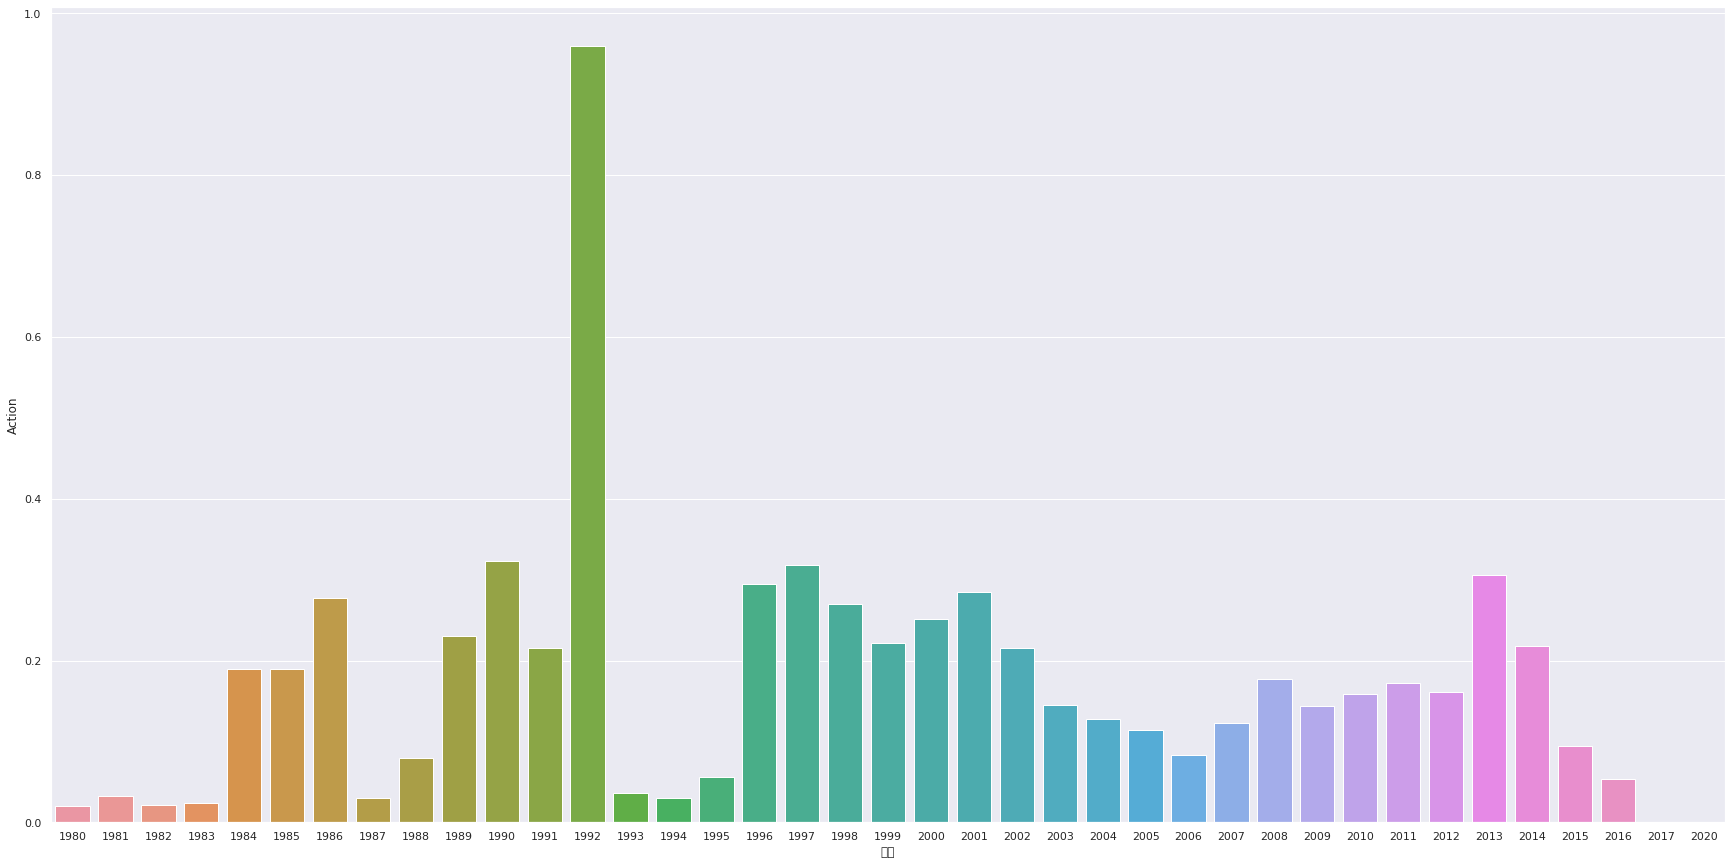

In [99]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Action')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


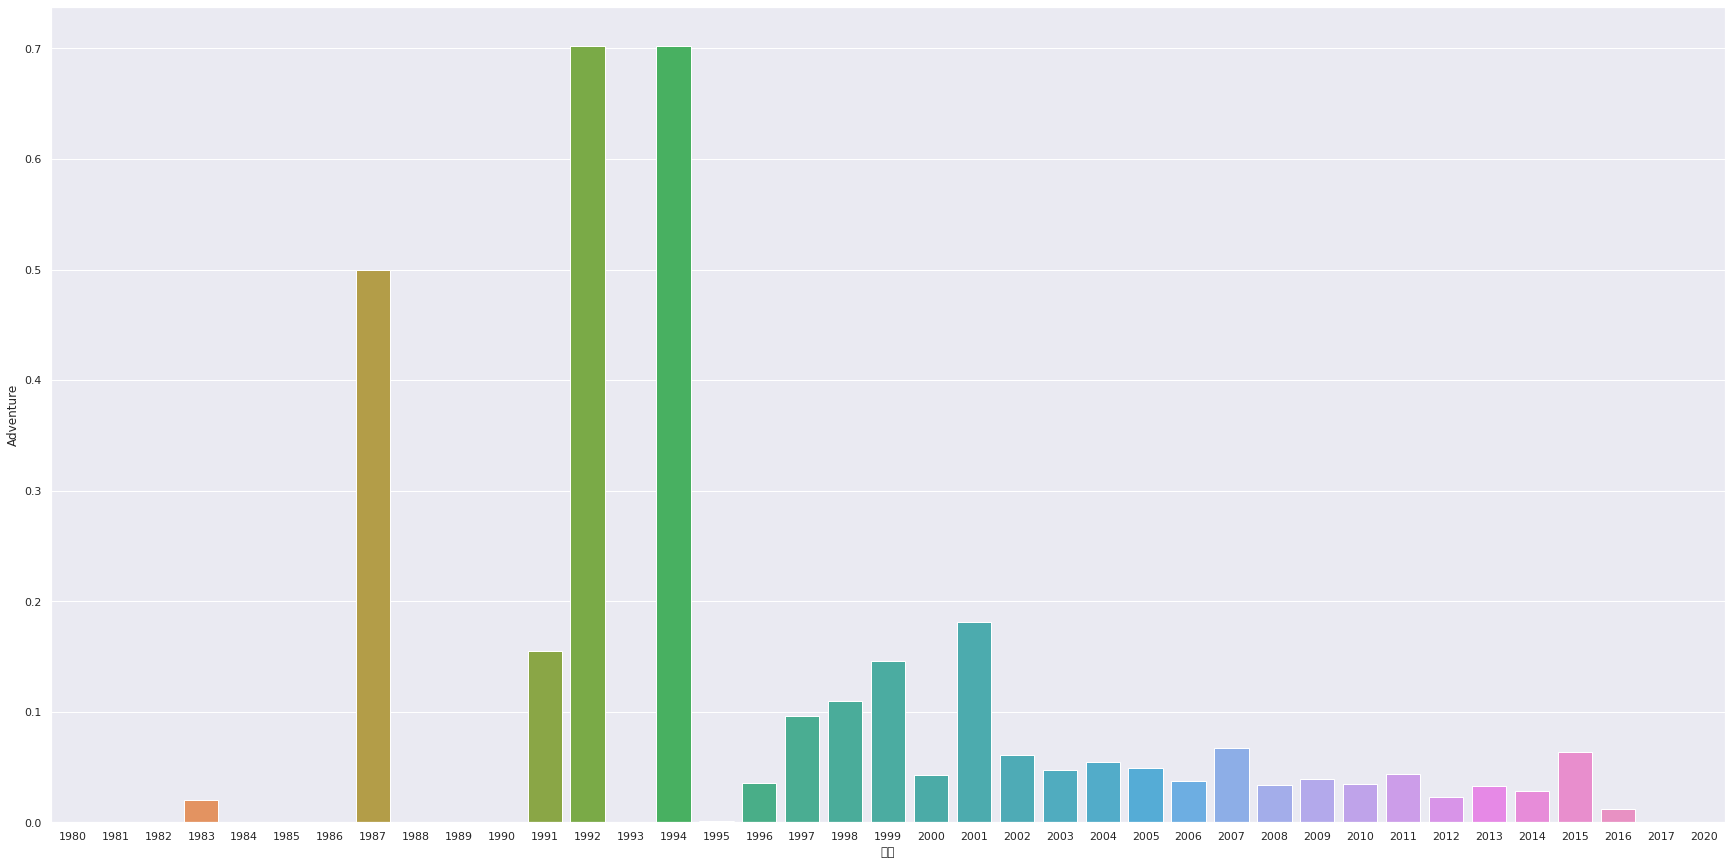

In [100]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Adventure')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


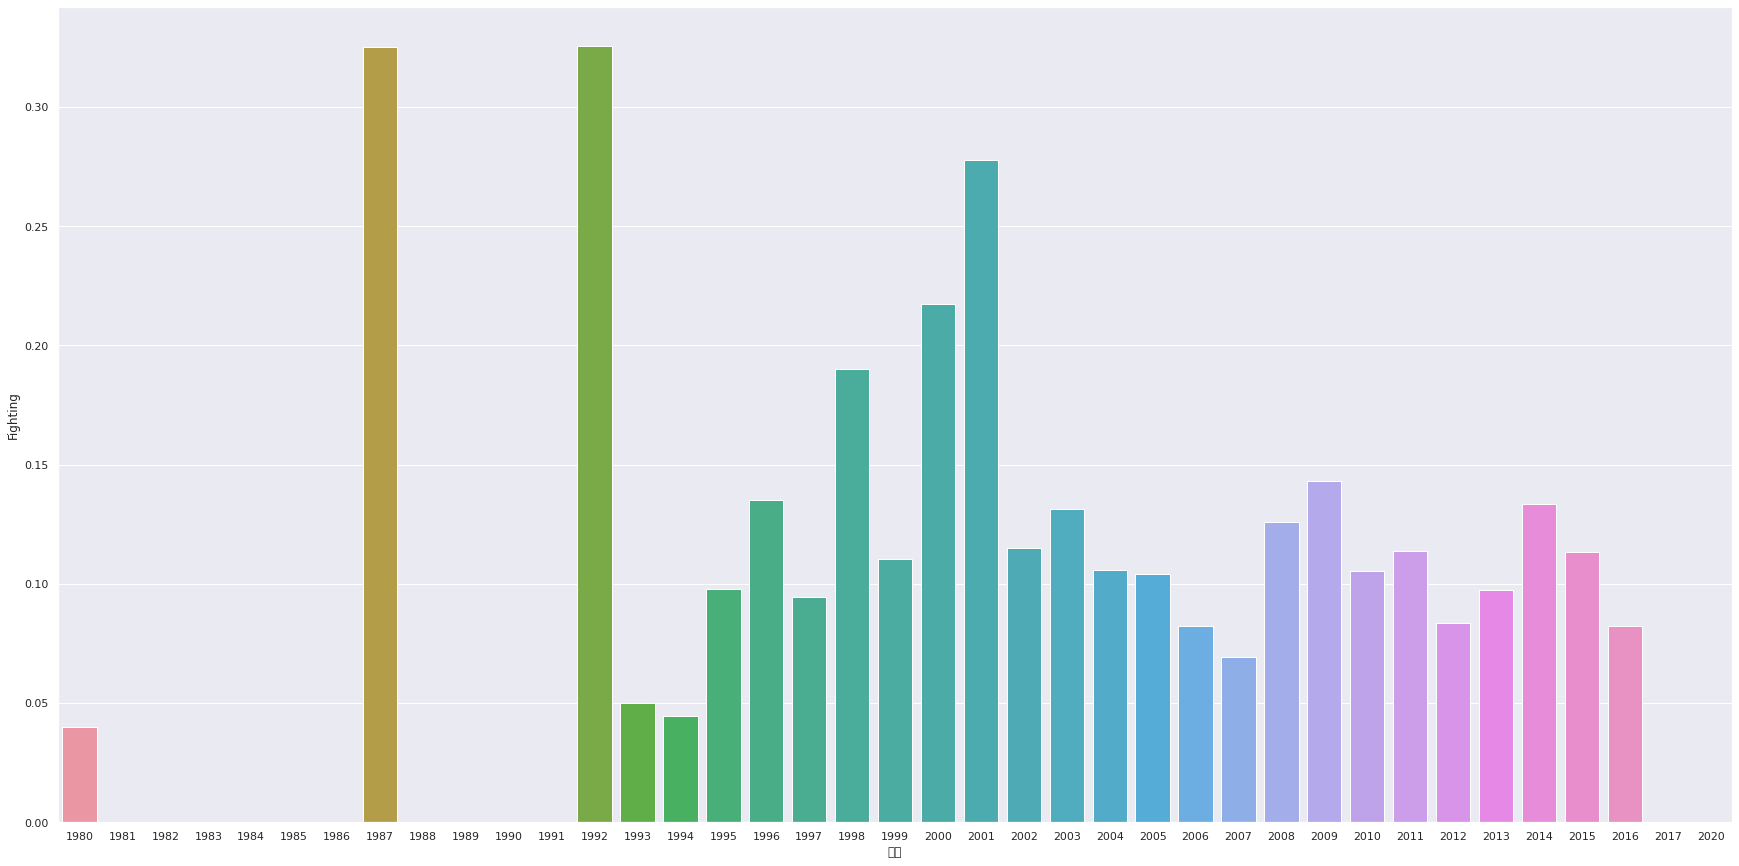

In [101]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Fighting')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


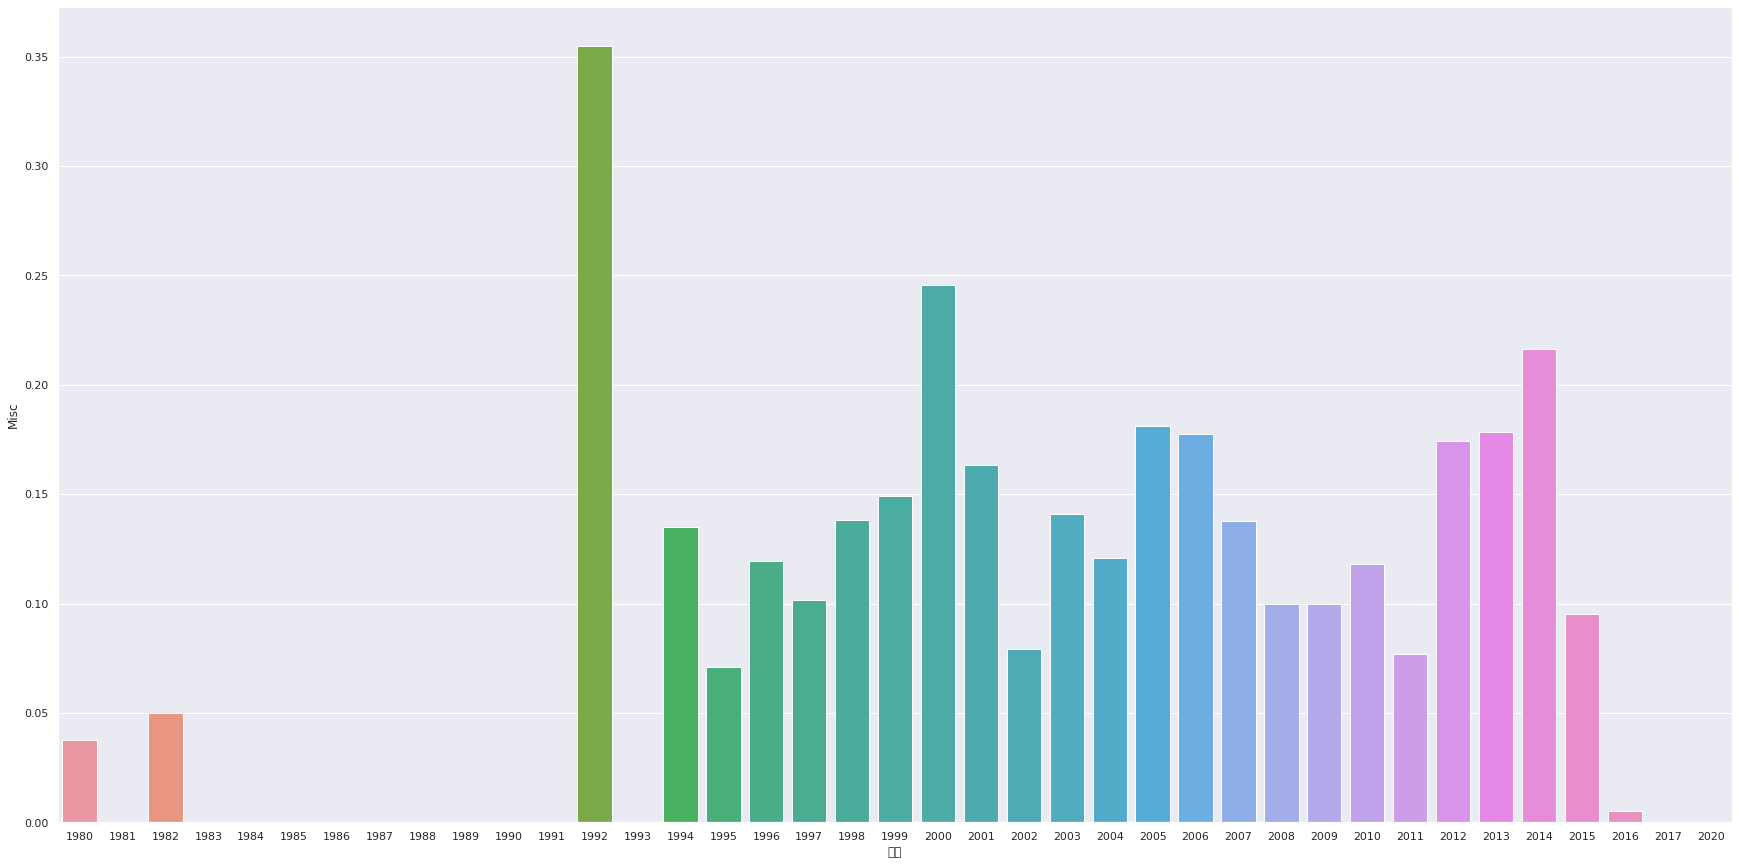

In [102]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Misc')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


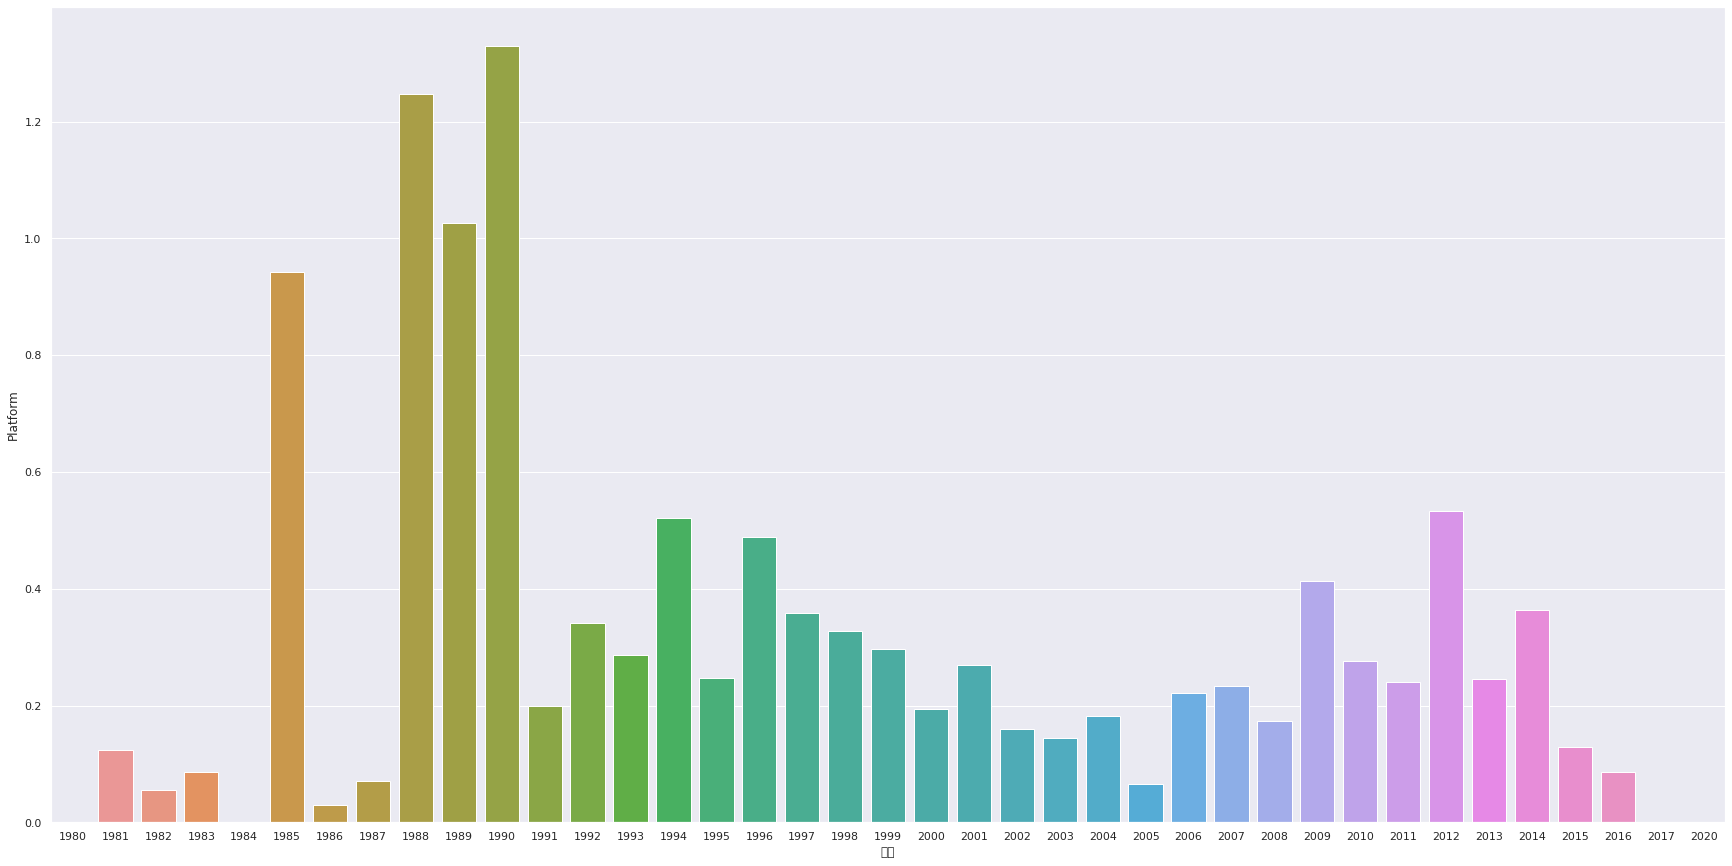

In [103]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Platform')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


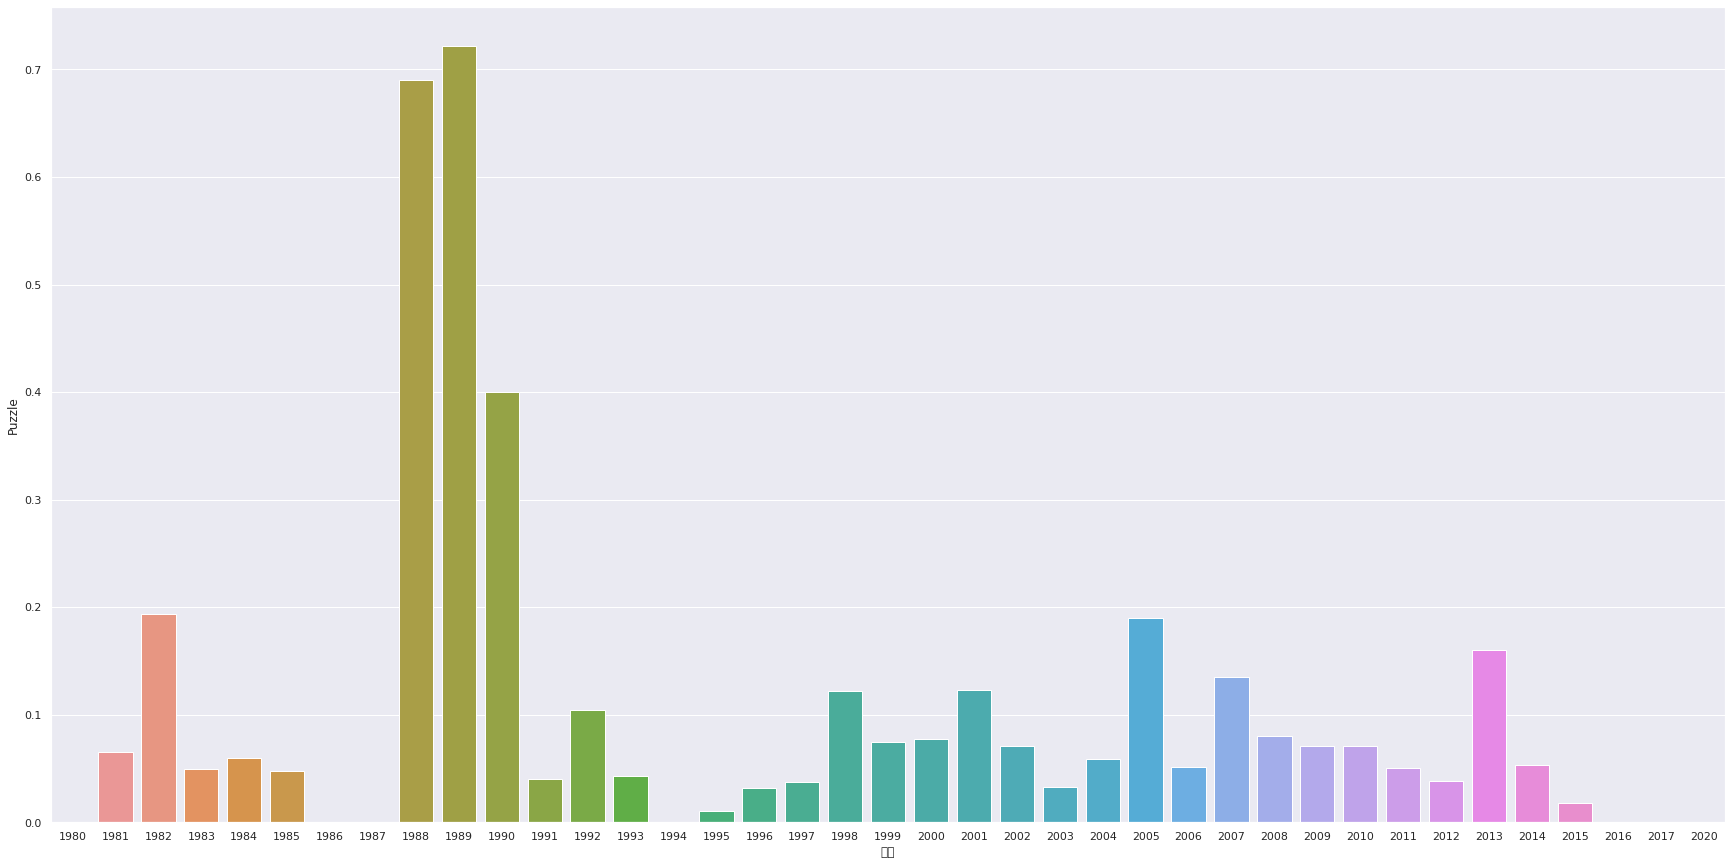

In [104]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Puzzle')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


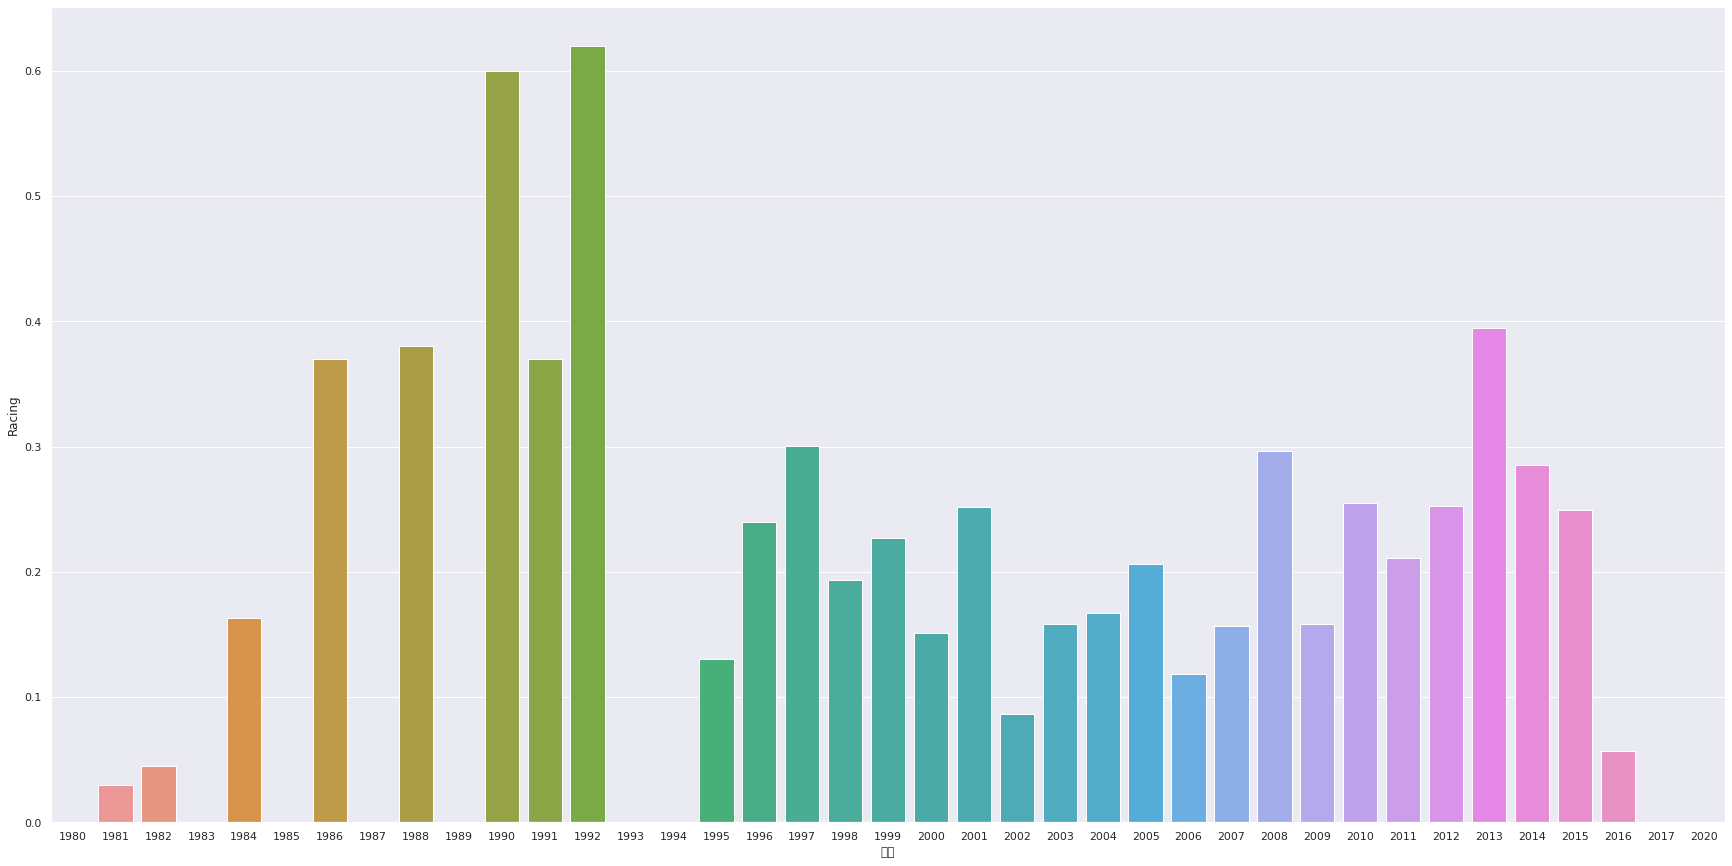

In [105]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Racing')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


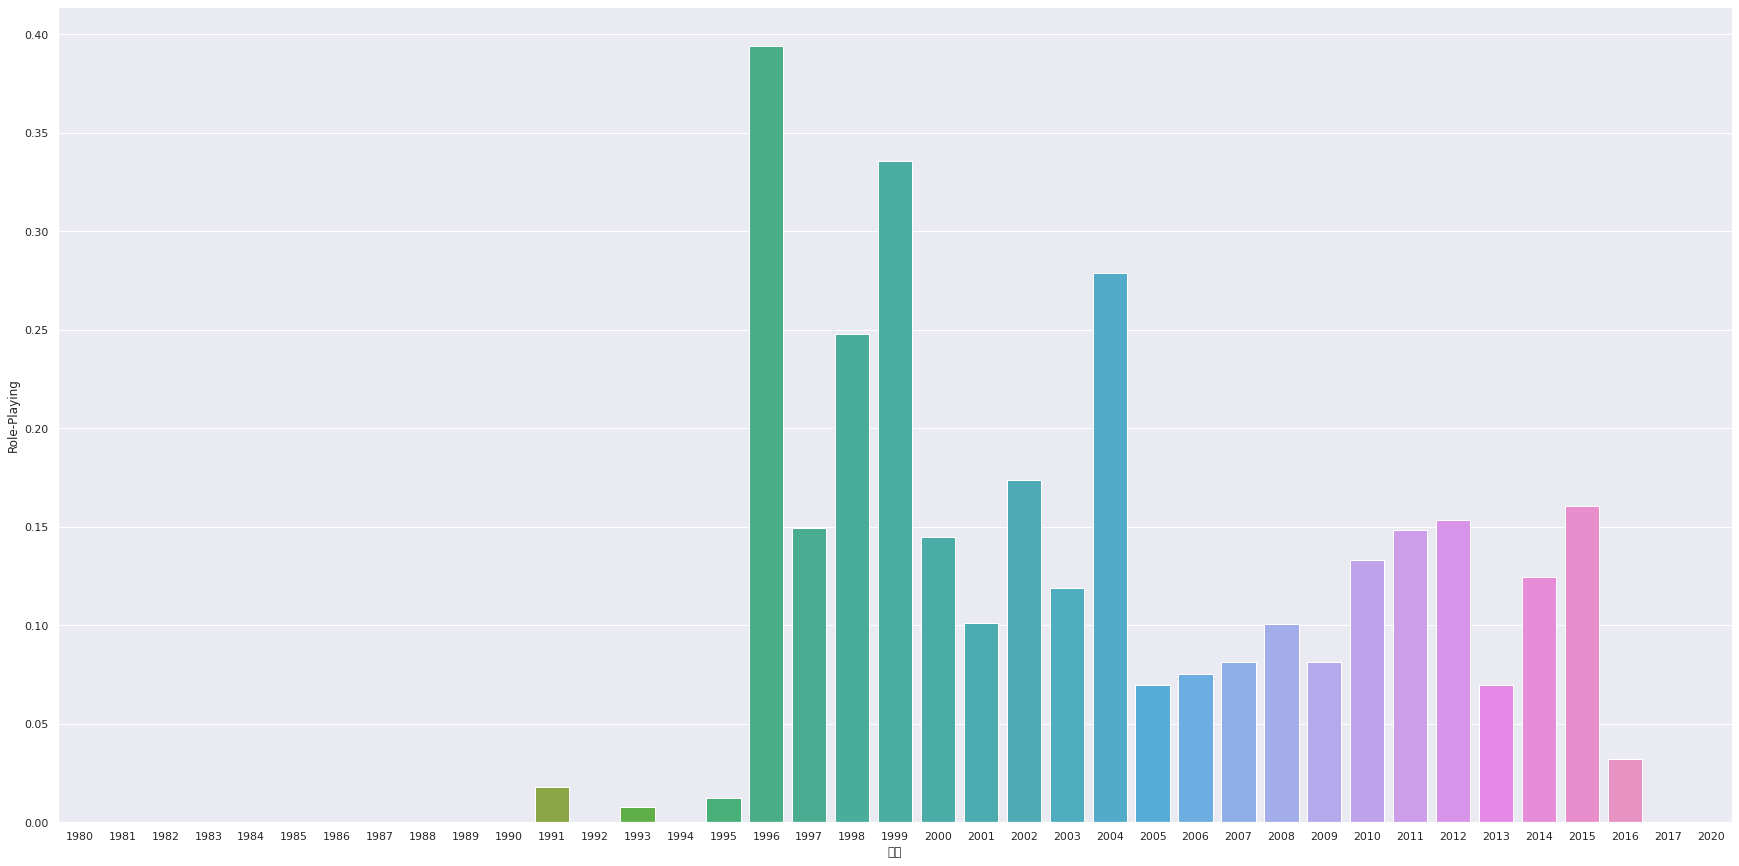

In [106]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Role-Playing')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


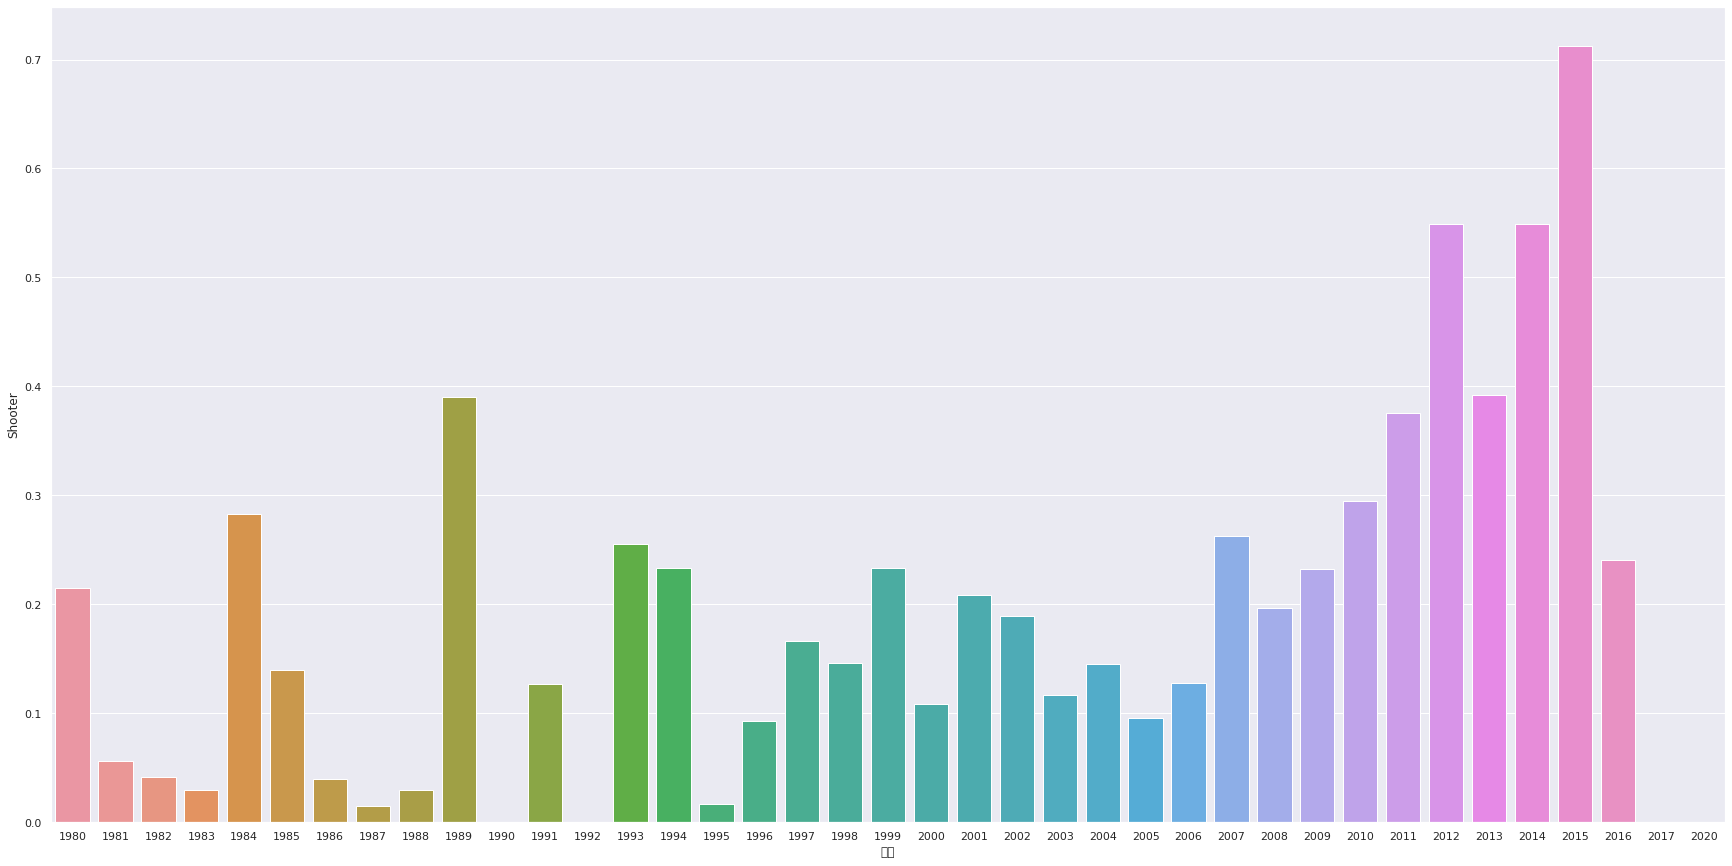

In [107]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Shooter')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


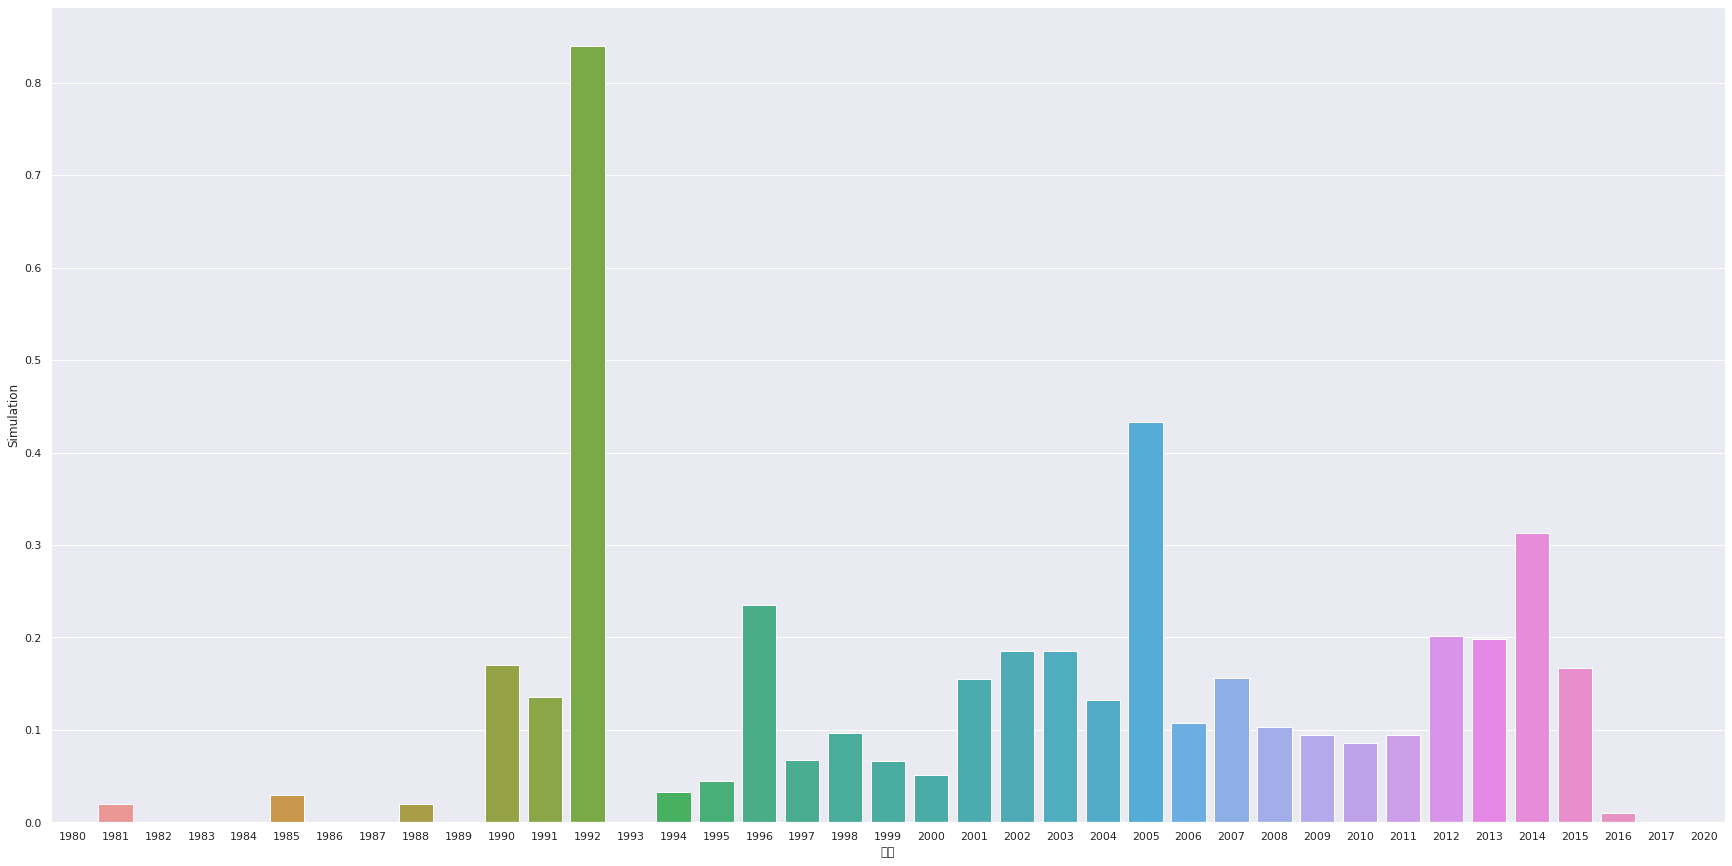

In [108]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Simulation')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


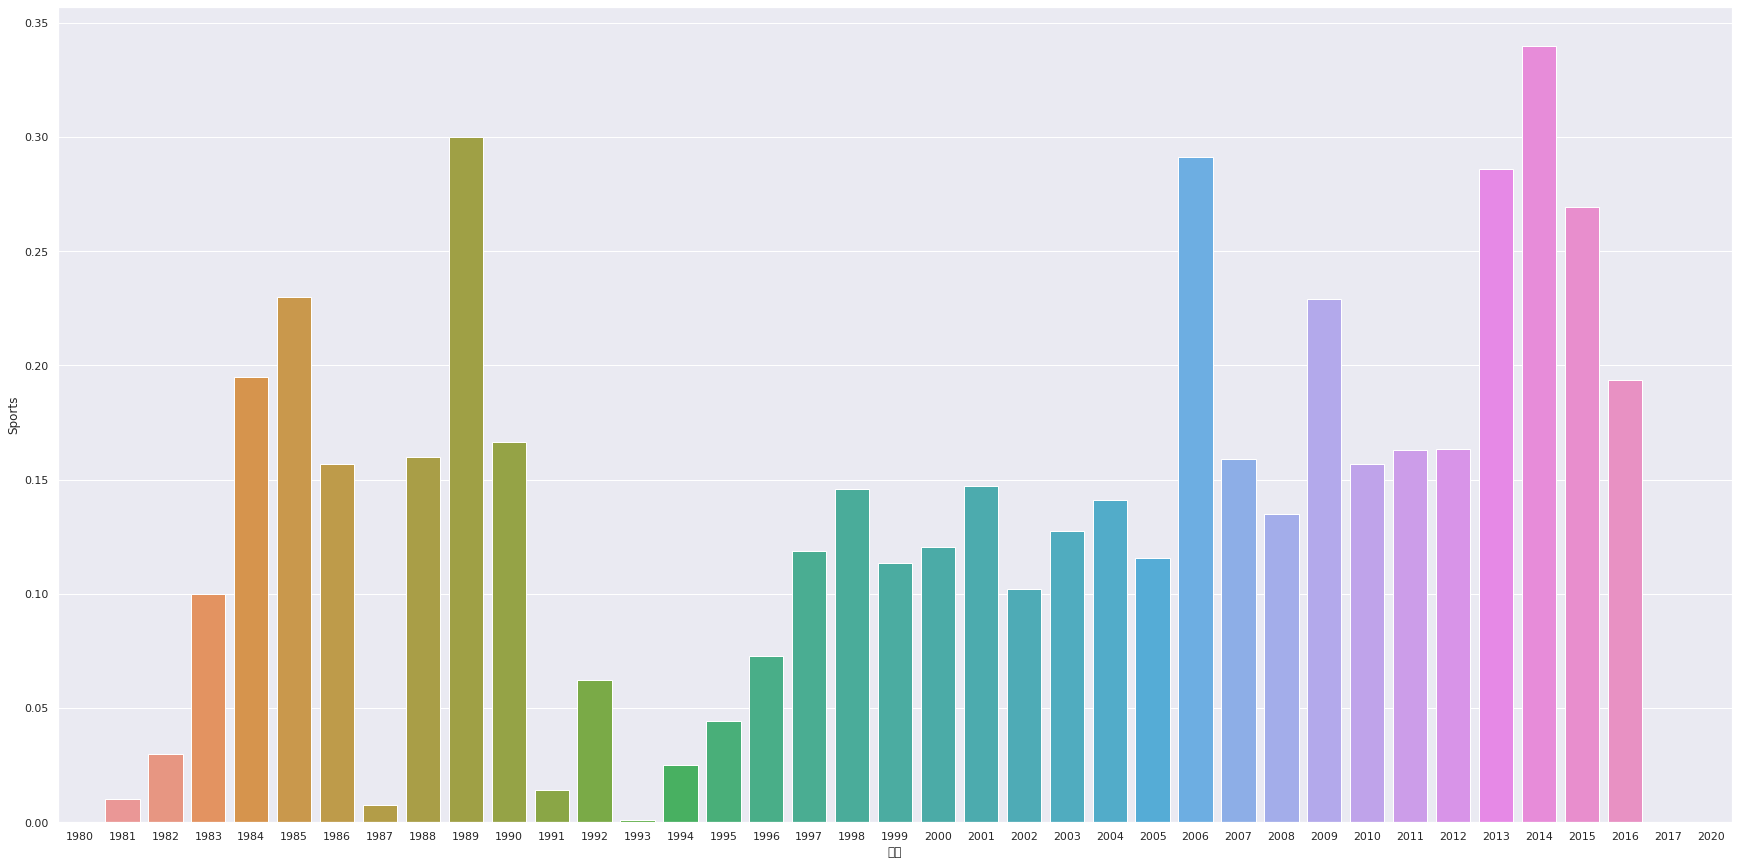

In [109]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Sports')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


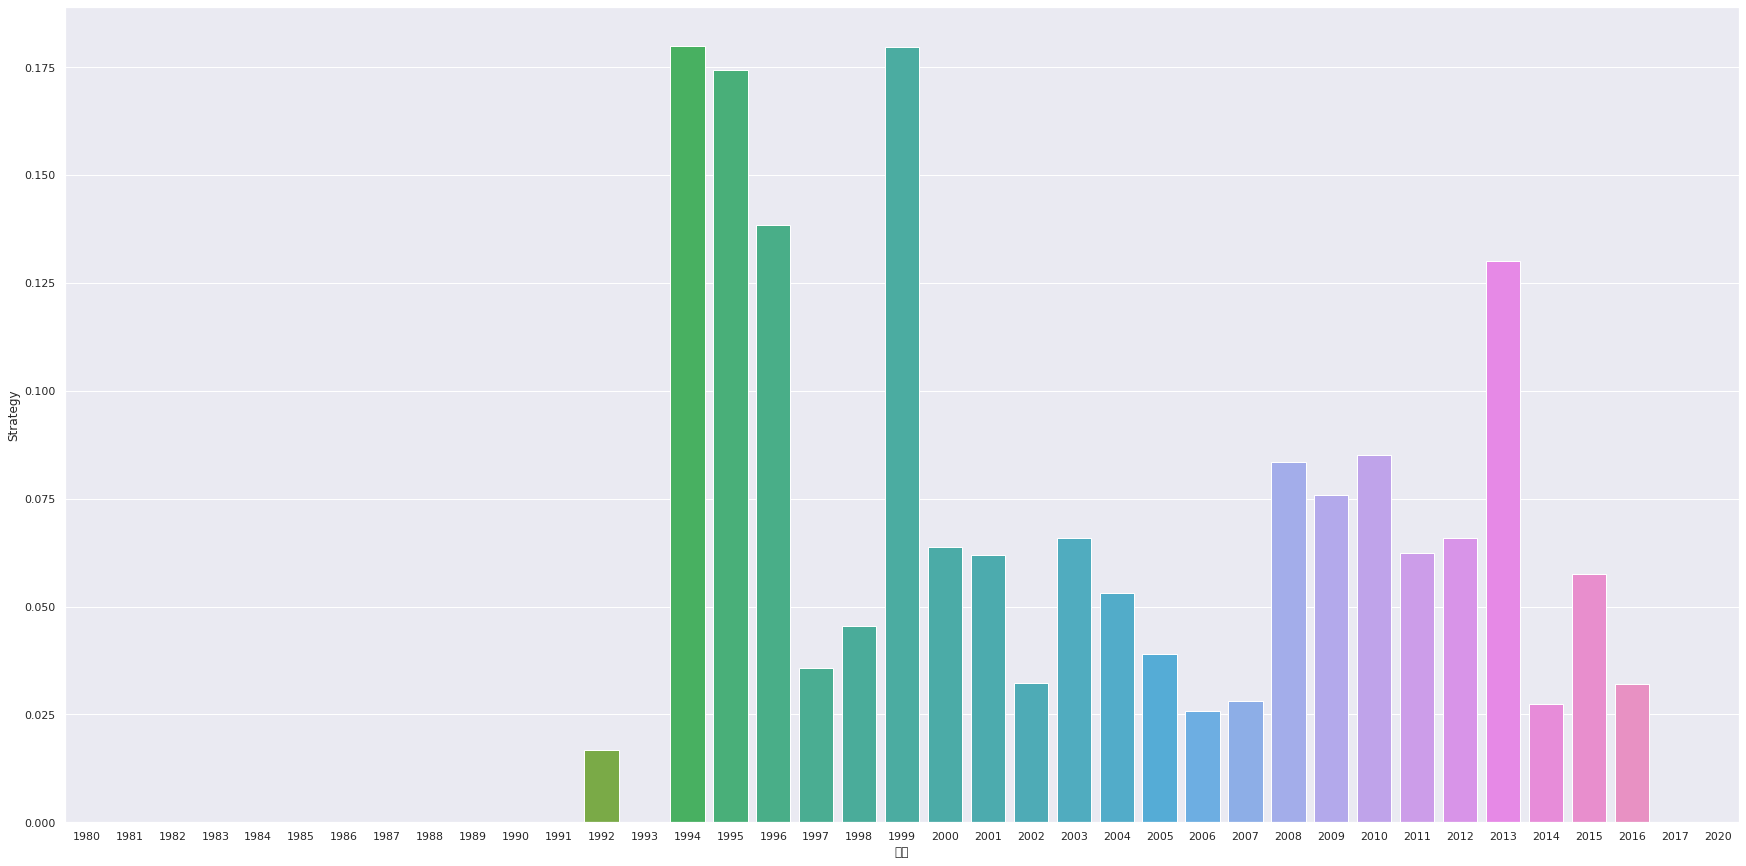

In [110]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales3, x='연도', y='Strategy')

# **기타국가 장르별 판매율(연도 추이)**

In [128]:
gen_sales4 = year_df.pivot_table(values='기타국가', index='연도', columns='장르').fillna(0)

gen_sales4

장르,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
연도,,,,,,,,,,,,
1980,0.000000,0.000000,0.010000,0.005000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000
1981,0.004800,0.000000,0.000000,0.000000,0.026667,0.015000,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000
1982,0.002778,0.000000,0.000000,0.010000,0.012000,0.036667,0.005000,0.000000,0.010000,0.000000,0.010000,0.000000
1983,0.002857,0.000000,0.000000,0.000000,0.016000,0.010000,0.000000,0.000000,0.010000,0.000000,0.020000,0.000000
1984,0.030000,0.000000,0.000000,0.000000,0.000000,0.013333,0.023333,0.000000,0.166667,0.000000,0.030000,0.000000
1985,0.030000,0.000000,0.000000,0.000000,0.200000,0.007500,0.000000,0.000000,0.000000,0.010000,0.020000,0.000000
1986,0.041667,0.000000,0.000000,0.000000,0.005000,0.000000,0.050000,1.510000,0.005000,0.000000,0.023333,0.000000
1987,0.005000,0.080000,0.050000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1988,0.005000,0.000000,0.000000,0.000000,0.175000,0.110000,0.100000,0.000000,0.010000,0.010000,0.025000,0.000000


In [130]:
gen_sales4 = gen_sales4.reset_index()

gen_sales4

장르,연도,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980,0.000000,0.000000,0.010000,0.005000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000
1,1981,0.004800,0.000000,0.000000,0.000000,0.026667,0.015000,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000
2,1982,0.002778,0.000000,0.000000,0.010000,0.012000,0.036667,0.005000,0.000000,0.010000,0.000000,0.010000,0.000000
3,1983,0.002857,0.000000,0.000000,0.000000,0.016000,0.010000,0.000000,0.000000,0.010000,0.000000,0.020000,0.000000
4,1984,0.030000,0.000000,0.000000,0.000000,0.000000,0.013333,0.023333,0.000000,0.166667,0.000000,0.030000,0.000000
5,1985,0.030000,0.000000,0.000000,0.000000,0.200000,0.007500,0.000000,0.000000,0.000000,0.010000,0.020000,0.000000
6,1986,0.041667,0.000000,0.000000,0.000000,0.005000,0.000000,0.050000,1.510000,0.005000,0.000000,0.023333,0.000000
7,1987,0.005000,0.080000,0.050000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1988,0.005000,0.000000,0.000000,0.000000,0.175000,0.110000,0.100000,0.000000,0.010000,0.010000,0.025000,0.000000
9,1989,0.025000,0.000000,0.000000,0.000000,0.156667,0.166000,0.000000,0.000000,0.040000,0.000000,0.036667,0.000000


In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Action')

In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Adventure')

In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Fighting')

In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Misc')

In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Platform')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


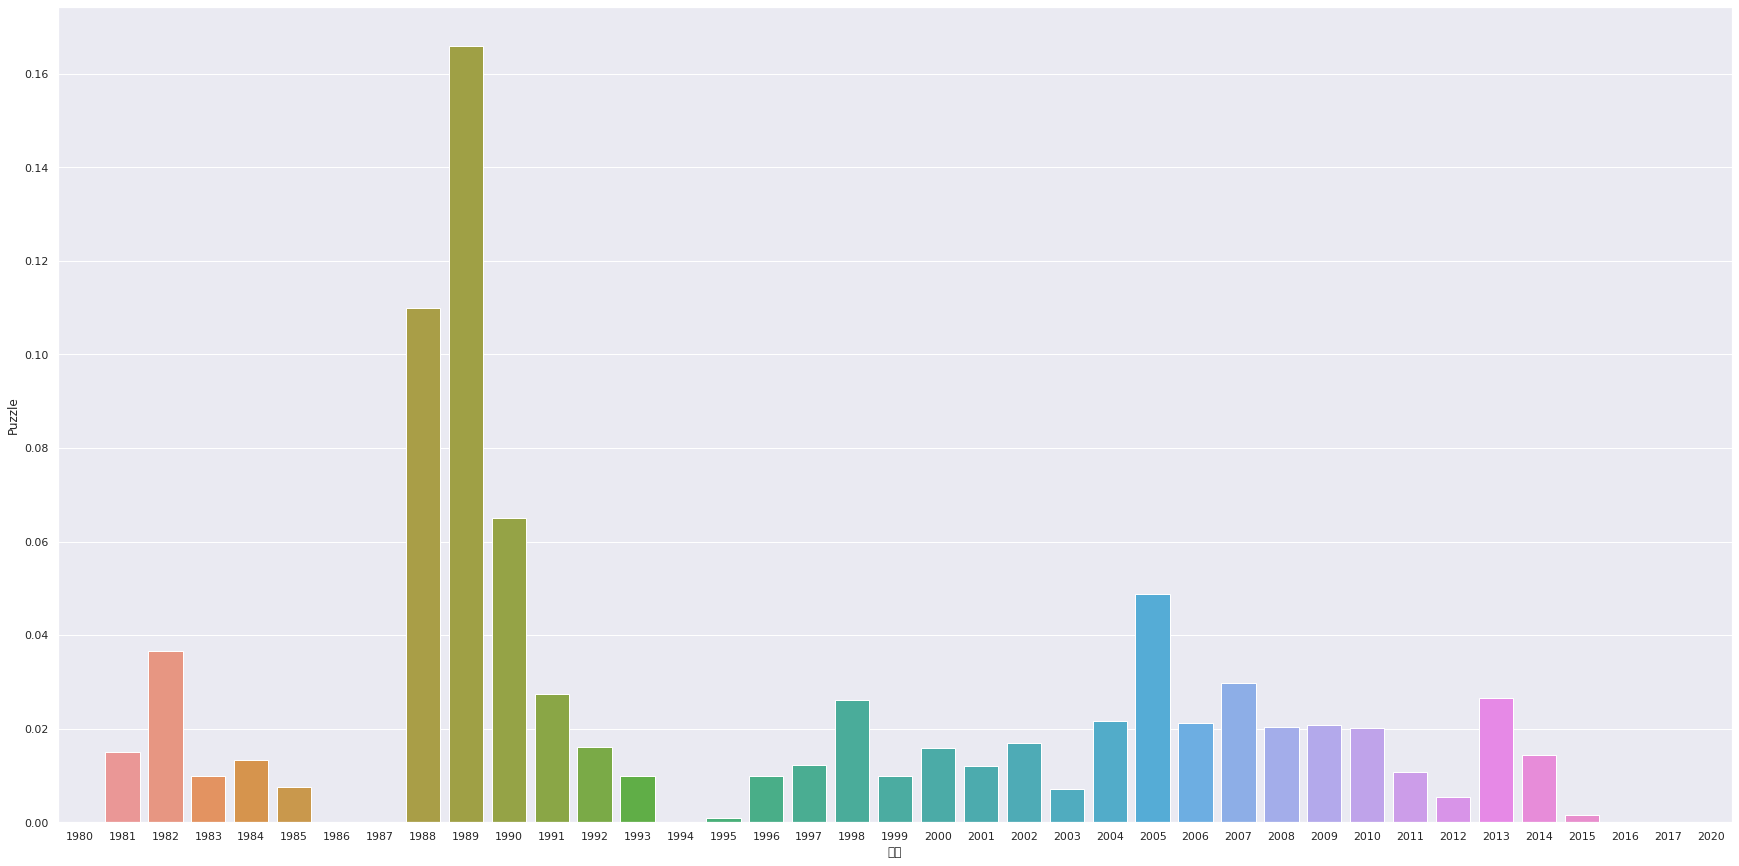

In [131]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Puzzle')

In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Racing')

In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Role-Playing')

In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Shooter')

In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Simulation')

In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Sports')

In [ ]:
fig, ax = plt.subplots(1,figsize=(30,15))
sns.barplot(data=gen_sales4, x='연도', y='Strategy')

# **연도별 eda 2 (게임기 변화)**

In [111]:
year_df

,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가,total
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
1,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
2,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
4,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00,0.11
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16238,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [112]:
gametool_df = year_df.groupby(['게임기', '연도']).sum()

In [ ]:
gametool_df

In [114]:
#feature engineering
gametool_df['total_sales'] = gametool_df['북미'] + gametool_df['유럽'] + gametool_df['일본'] + gametool_df['기타국가']


In [115]:
#모든 국가의 판매량을 다 더한 새로운 컬럼 형성 
#이때 보이는 판매량은 -> 그 년도의 해당 게임기를 이용한 개임의 판매량을 다 더한 것 .
gametool_df

북미     유럽    일본  기타국가  total  total_sales
게임기  연도                                                
2600 1980  10.13   0.64  0.00  0.11  10.88        10.88
     1981  33.40   1.96  0.00  0.32  35.68        35.68
     1982  26.92   1.65  0.00  0.31  28.88        28.88
     1983   5.44   0.34  0.00  0.06   5.84         5.84
     1984   0.26   0.01  0.00  0.00   0.27         0.27
...          ...    ...   ...   ...    ...          ...
XB   2008   0.13   0.04  0.00  0.01   0.18         0.18
XOne 2013  11.80   5.29  0.02  1.50  18.61        18.61
     2014  30.41  17.75  0.14  4.14  52.44        52.44
     2015  34.29  17.96  0.17  5.23  57.65        57.65
     2016   6.69   4.63  0.01  1.05  12.38        12.38

[243 rows x 6 columns]

In [116]:
gametool_df.reset_index(drop=False, inplace=True)

In [117]:
gametool_df['게임기'].unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'Video', 'WS', 'Wii', 'WiiU',
       'X360', 'XB', 'XOne'], dtype=object)

In [118]:
gametool_df

,게임기,연도,북미,유럽,일본,기타국가,total,total_sales
0,2600,1980,10.13,0.64,0.00,0.11,10.88,10.88
1,2600,1981,33.40,1.96,0.00,0.32,35.68,35.68
2,2600,1982,26.92,1.65,0.00,0.31,28.88,28.88
3,2600,1983,5.44,0.34,0.00,0.06,5.84,5.84
4,2600,1984,0.26,0.01,0.00,0.00,0.27,0.27
...,...,...,...,...,...,...,...,...
238,XB,2008,0.13,0.04,0.00,0.01,0.18,0.18
239,XOne,2013,11.80,5.29,0.02,1.50,18.61,18.61
240,XOne,2014,30.41,17.75,0.14,4.14,52.44,52.44
241,XOne,2015,34.29,17.96,0.17,5.23,57.65,57.65


In [119]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
gametool_df

,게임기,연도,북미,유럽,일본,기타국가,total,total_sales
0,2600,1980,10.13,0.64,0.00,0.11,10.88,10.88
1,2600,1981,33.40,1.96,0.00,0.32,35.68,35.68
2,2600,1982,26.92,1.65,0.00,0.31,28.88,28.88
3,2600,1983,5.44,0.34,0.00,0.06,5.84,5.84
4,2600,1984,0.26,0.01,0.00,0.00,0.27,0.27
5,2600,1985,0.42,0.03,0.00,0.00,0.45,0.45
6,2600,1986,0.63,0.04,0.00,0.00,0.67,0.67
7,2600,1987,1.84,0.09,0.00,0.01,1.94,1.94
8,2600,1988,0.69,0.04,0.00,0.01,0.74,0.74
9,2600,1989,0.59,0.03,0.00,0.01,0.63,0.63


In [120]:
gametool_df1 = gametool_df.sort_values(by=['연도'], axis=0) 

In [121]:
gametool_df1 = gametool_df1.drop(['북미', '유럽', '일본', '기타국가'], axis=1)

In [122]:
gametool_df1

,게임기,연도,total,total_sales
0,2600,1980,10.88,10.88
1,2600,1981,35.68,35.68
2,2600,1982,28.88,28.88
3,2600,1983,5.84,5.84
79,NES,1983,10.96,10.96
80,NES,1984,50.08,50.08
4,2600,1984,0.27,0.27
25,DS,1985,0.02,0.02
95,PC,1985,0.04,0.04
5,2600,1985,0.45,0.45


In [123]:
pivot_gametool = gametool_df1.pivot(index='연도', columns='게임기', values='total_sales')

In [124]:
gametool_df2 = pivot_gametool.fillna(0)

In [125]:
gametool_df2

게임기,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,Video,WS,Wii,WiiU,X360,XB,XOne
연도,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,10.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,53.44,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.00,45.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [126]:
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text

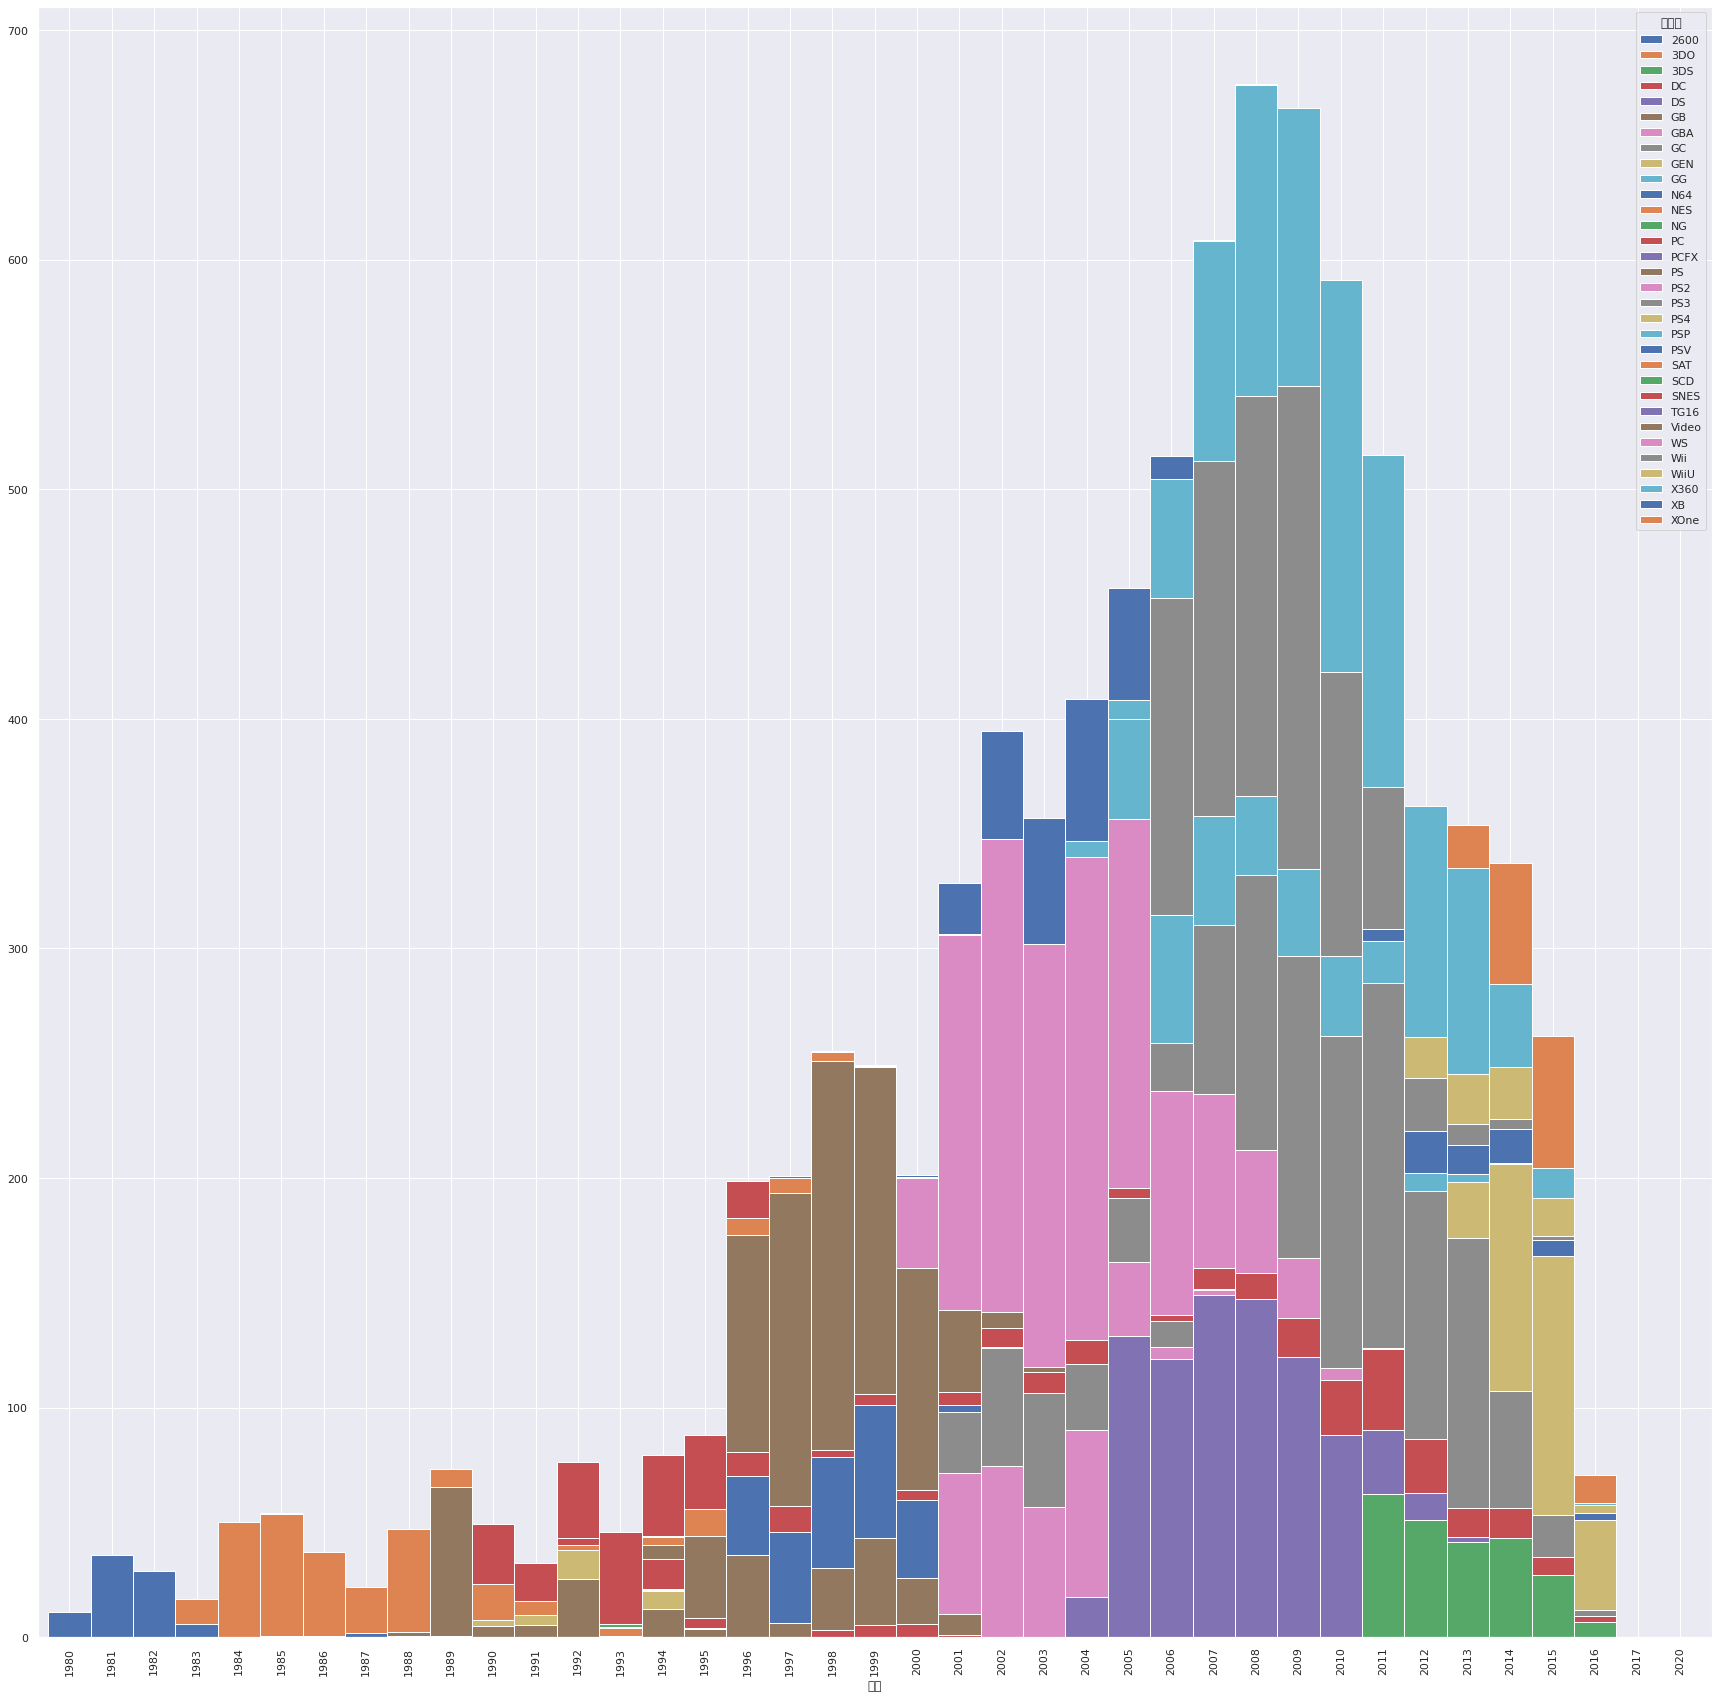

In [127]:
# Stacked Bar Chart
gametool_df2.plot.bar(stacked=True, figsize=(30,30), width=1.0)

# **게임순위에 따른 분석**

In [ ]:
year_df

,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01
1,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05
2,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00
4,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00
16238,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00


In [ ]:
year_df['total'] = year_df['북미'] + year_df['일본'] + year_df['유럽'] + year_df['기타국가']

In [ ]:
year_df

,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가,total
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
1,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
2,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
4,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00,0.11
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16238,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [ ]:
#내림차순 정렬
title_df = year_df.sort_values(by=['total'], axis=0, ascending=False) 

In [ ]:
title_df.reset_index(drop=False, inplace=True)

In [ ]:
title_df

,index,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가,total
0,6455,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,129,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,8805,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,10664,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,883,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...,...
16236,9152,Kikiite Hajimaru: Eigo Kaiwa Training - KikiTore,DS,2008,Misc,Benesse,0.00,0.00,0.01,0.00,0.01
16237,9151,Neo Angelique Special,PSP,2008,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16238,12713,Red Stone DS: Akaki Ishi ni Michibikareshi Mon...,DS,2011,Role-Playing,Unknown,0.00,0.00,0.01,0.00,0.01
16239,14695,Caladrius,X360,2013,Shooter,Moss,0.00,0.00,0.01,0.00,0.01


In [ ]:
#판매량 20위!!
top_df = title_df.head(20)

top_df

,index,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가,total
0,6455,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,129,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,8805,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,10664,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,883,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,200,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,6143,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,6412,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,10671,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,116,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
top_df = top_df.drop(['index'], axis=1)

국가별로 파이차트 그려보기!

In [ ]:
top_df

,타이틀,게임기,연도,장르,게임사,북미,유럽,일본,기타국가,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
new_top_df = top_df.drop(['게임기','장르', '연도', '게임사', 'total'], axis=1)
new_top_df

,타이틀,북미,유럽,일본,기타국가
0,Wii Sports,41.49,29.02,3.77,8.46
1,Super Mario Bros.,29.08,3.58,6.81,0.77
2,Mario Kart Wii,15.85,12.88,3.79,3.31
3,Wii Sports Resort,15.75,11.01,3.28,2.96
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00
5,Tetris,23.20,2.26,4.22,0.58
6,New Super Mario Bros.,11.38,9.23,6.50,2.90
7,Wii Play,14.03,9.20,2.93,2.85
8,New Super Mario Bros. Wii,14.59,7.06,4.70,2.26
9,Duck Hunt,26.93,0.63,0.28,0.47


In [65]:
df1 = new_top_df.T

df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
타이틀,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue,Tetris,New Super Mario Bros.,Wii Play,New Super Mario Bros. Wii,Duck Hunt,Nintendogs,Mario Kart DS,Pokemon Gold/Pokemon Silver,Wii Fit,Wii Fit Plus,Kinect Adventures!,Grand Theft Auto V,Grand Theft Auto: San Andreas,Super Mario World,Brain Age: Train Your Brain in Minutes a Day
북미,41.49,29.08,15.85,15.75,11.27,23.2,11.38,14.03,14.59,26.93,9.07,9.81,9,8.94,9.09,14.97,7.01,9.43,12.78,4.75
유럽,29.02,3.58,12.88,11.01,8.89,2.26,9.23,9.2,7.06,0.63,11,7.57,6.18,8.03,8.59,4.94,9.27,0.4,3.75,9.26
일본,3.77,6.81,3.79,3.28,10.22,4.22,6.5,2.93,4.7,0.28,1.93,4.13,7.2,3.6,2.53,0.24,0.97,0.41,3.54,4.16
기타국가,8.46,0.77,3.31,2.96,1,0.58,2.9,2.85,2.26,0.47,2.75,1.92,0.71,2.15,1.79,1.67,4.14,10.57,0.55,2.05


KeyError: ignored

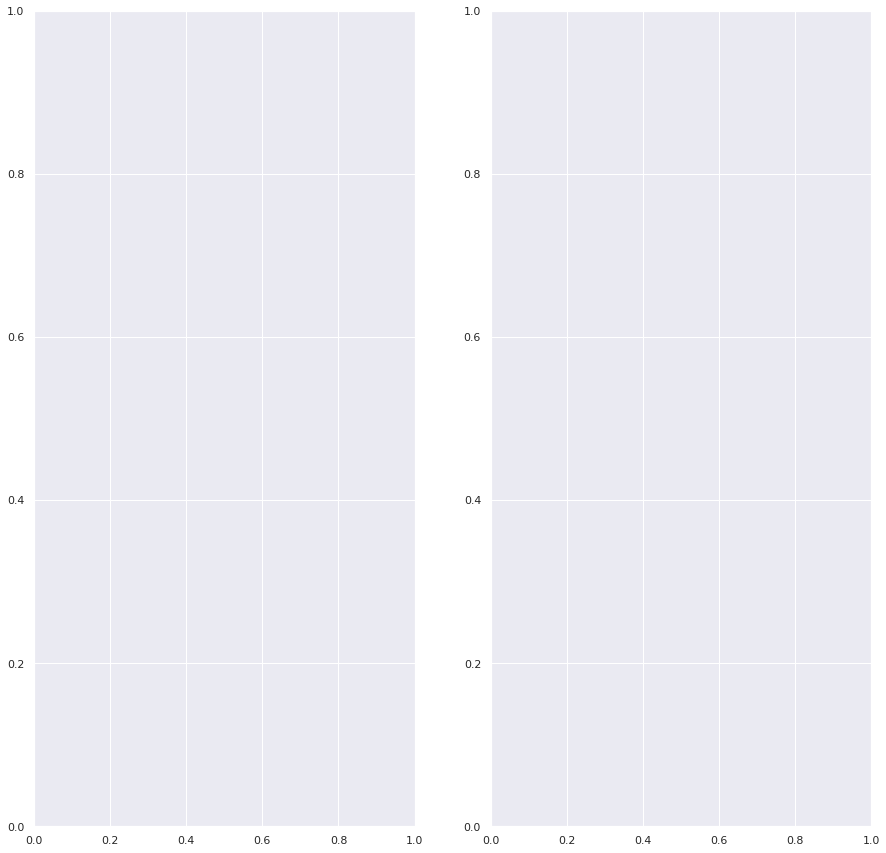

In [66]:
fig, ax = plt.subplots(1,2,figsize=(15,15))

df1['Wii Sports'].plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True,startangle=90)
#top_df['유럽'].plot.pie(explode=None,autopct='%1.1f%%',ax=ax[1],shadow=True,startangle=90)

ax[0].set_title('Wii Sports 지역별 판매율')
ax[0].set_ylabel('')
ax[1].set_title('Super Mario Bros. 지역별 판매율')
ax[1].set_ylabel('')


